<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/Q2_NNFL_Assignment1_SoumilHooda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import numpy.random as nr

In [3]:
def cost_function_PR(X,y,w):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)
  return J

In [4]:
def cost_function_PR_L2(X,y,w,lamb):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)+(lamb/2)*np.sum(w**2)
  return J

In [5]:
def cost_function_PR_L1(X,y,w,lamb):
  hypothesis = np.dot(X,w.T)
  J = 1/(2*len(y))*np.sum((hypothesis-y)**2)+(lamb/2)*np.sum(np.abs(w))
  return J

In [6]:
def batch_gd_PR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
      hypothesis = np.dot(X,w.T)
      w = w - (alpha/len(y))*(np.dot((hypothesis-y).T,X))
      cost_history[i] = cost_function_PR(X,y,w)
  return w, cost_history

In [7]:
def batch_gd_PR_L2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = w*(1-(alpha*lamb)) - alpha/len(y)*(np.dot((hypothesis-y).T,X))
    cost_history[i] = cost_function_PR_L2(X,y,w,lamb)
  return w, cost_history

In [8]:
def batch_gd_PR_L1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha/len(y)*(np.dot((hypothesis-y).T,X))
    cost_history[i] = cost_function_PR_L1(X,y,w,lamb)
  return w, cost_history

In [9]:
def MB_gd_PR(X,y,w,alpha,iters,batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size,]
    w = w - alpha/batch_size * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_PR(ind_x,ind_y,w)
  return w, cost_history

In [10]:
def MB_gd_PR_L2(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w*(1-(alpha*lamb)) - alpha/batch_size * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_PR_L2(ind_x,ind_y,w,lamb)
  return w, cost_history

In [11]:
def MB_gd_PR_L1(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha/batch_size * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_PR_L1(ind_x,ind_y,w,lamb)
  return w, cost_history

In [12]:
def S_gd_PR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_PR(ind_x,ind_y,w)
  return w, cost_history

In [13]:
def S_gd_PR_L2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w*(1-(alpha*lamb)) - alpha * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_PR_L2(ind_x,ind_y,w,lamb)
  return w, cost_history

In [14]:
def S_gd_PR_L1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = nr.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha * ((ind_x.T.dot(ind_x.dot(w.T)-ind_y)).T)
    cost_history[i] = cost_function_PR_L1(ind_x,ind_y,w,lamb)
  return w, cost_history

In [15]:
def MeanSquareError(Ypred, Yte):
  mse = np.sum((np.square(Ypred - Yte)).mean(axis=0))
  return mse

In [16]:
def MeanAbsoluteError(Ypred, Yte):
  mae = np.sum(np.abs((Ypred-Yte)).mean(axis=0))
  return mae

In [17]:
def corr(Ypred, Yte):
  corrvalue = (np.sum(np.dot((Ypred-np.mean(Ypred,axis=0)).T,(Yte-np.mean(Yte,axis=0)))))/(np.std(Ypred,axis=0)*np.std(Yte,axis=0)*Yte.shape[0])
  return corrvalue

In [18]:
xtrdata = pd.read_csv('/content/drive/MyDrive/xtr.csv',header=None)
ytrdata = pd.read_csv('/content/drive/MyDrive/ytr.csv',header=None)
xtedata = pd.read_csv('/content/drive/MyDrive/xte.csv',header=None)
ytedata = pd.read_csv('/content/drive/MyDrive/yte.csv',header=None)
print(xtrdata)
print(ytrdata)
print(xtedata)
print(ytedata)

        0     1
0   17.40  7.14
1   17.40  8.98
2   17.40  8.64
3   17.40  6.94
4   17.40  8.68
5   17.40  7.02
6   17.40  8.52
7   17.40  8.70
8   17.40  7.26
9   17.40  8.72
10  17.40  8.64
11  17.84  9.14
12  18.28  8.12
13  16.91  7.62
14  16.47  8.66
15  17.40  9.16
16  17.84  9.68
17  18.27  8.16
18  16.47  7.64
19  17.39  8.70
20  17.82  9.20
21  18.27  9.68
22  16.94  8.20
23  16.47  7.72
24  17.40  8.68
25  17.81  9.16
26  18.25  9.68
27  16.92  8.18
28  16.47  7.68
29  17.40  8.62
30  17.86  9.14
31  18.30  9.63
32  16.92  8.12
33  16.43  7.63
34  17.40  8.62
35  17.85  9.13
36  18.28  9.62
37  16.94  8.14
38  16.46  7.64
39  17.40  9.30
40  17.40  8.98
41  17.40  8.60
42  17.40  8.62
43  17.40  8.60
44  17.40  8.62
45  17.40  8.56
46  17.88  9.06
47  18.32  9.56
48  16.96  8.06
49  16.48  7.56
50  17.40  8.56
51  17.85  9.06
52  18.29  9.56
53  16.93  8.06
54  16.46  7.56
       0
0   1.24
1   1.24
2   1.24
3   1.24
4   1.24
5   1.24
6   1.18
7   1.24
8   1.24
9   1.24
10  1

In [19]:
xtrdatan = xtrdata.values
Xtr = xtrdatan[:,[0,1]]
X1 = xtrdatan[:,[0]]
X2 = xtrdatan[:,[1]]
X1_Squared = np.square(X1)
X2_Squared = np.square(X2)
X1X2 = np.multiply(X1,X2)


In [20]:
Xtr = np.append(Xtr, X1_Squared, axis=1)
Xtr = np.append(Xtr, X2_Squared, axis =1)
Xtr = np.append(Xtr, X1X2, axis=1)
print(Xtr)

[[ 17.4      7.14   302.76    50.9796 124.236 ]
 [ 17.4      8.98   302.76    80.6404 156.252 ]
 [ 17.4      8.64   302.76    74.6496 150.336 ]
 [ 17.4      6.94   302.76    48.1636 120.756 ]
 [ 17.4      8.68   302.76    75.3424 151.032 ]
 [ 17.4      7.02   302.76    49.2804 122.148 ]
 [ 17.4      8.52   302.76    72.5904 148.248 ]
 [ 17.4      8.7    302.76    75.69   151.38  ]
 [ 17.4      7.26   302.76    52.7076 126.324 ]
 [ 17.4      8.72   302.76    76.0384 151.728 ]
 [ 17.4      8.64   302.76    74.6496 150.336 ]
 [ 17.84     9.14   318.2656  83.5396 163.0576]
 [ 18.28     8.12   334.1584  65.9344 148.4336]
 [ 16.91     7.62   285.9481  58.0644 128.8542]
 [ 16.47     8.66   271.2609  74.9956 142.6302]
 [ 17.4      9.16   302.76    83.9056 159.384 ]
 [ 17.84     9.68   318.2656  93.7024 172.6912]
 [ 18.27     8.16   333.7929  66.5856 149.0832]
 [ 16.47     7.64   271.2609  58.3696 125.8308]
 [ 17.39     8.7    302.4121  75.69   151.293 ]
 [ 17.82     9.2    317.5524  84.64   16

In [21]:
xmintr = np.min(Xtr, axis=0)
xmaxtr = np.max(Xtr, axis=0)
Xtr = ((Xtr - xmintr)/(xmaxtr - xmintr))
print(Xtr)

[[0.51322751 0.0729927  0.49963991 0.06183738 0.06203474]
 [0.51322751 0.74452555 0.49963991 0.71316767 0.63275434]
 [0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [0.51322751 0.         0.49963991 0.         0.        ]
 [0.51322751 0.6350365  0.49963991 0.59682732 0.53970223]
 [0.51322751 0.02919708 0.49963991 0.02452414 0.0248139 ]
 [0.51322751 0.57664234 0.49963991 0.53639534 0.49007444]
 [0.51322751 0.64233577 0.49963991 0.60446037 0.54590571]
 [0.51322751 0.11678832 0.49963991 0.09978304 0.09925558]
 [0.51322751 0.64963504 0.49963991 0.61211099 0.55210918]
 [0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [0.74603175 0.80291971 0.73572685 0.77683206 0.75407148]
 [0.97883598 0.43065693 0.97770926 0.39023426 0.49338296]
 [0.25396825 0.24817518 0.24366336 0.2174146  0.14435912]
 [0.02116402 0.62773723 0.0200373  0.58921184 0.38993112]
 [0.51322751 0.81021898 0.49963991 0.78486917 0.68858561]
 [0.74603175 1.         0.73572685 1.         0.92580075]
 [0.97354497 0

In [22]:
m = Xtr.shape[0]

In [23]:
pp = np.ones([m,1])
Xtr = np.append(pp,Xtr,axis=1)
print(Xtr)

[[1.         0.51322751 0.0729927  0.49963991 0.06183738 0.06203474]
 [1.         0.51322751 0.74452555 0.49963991 0.71316767 0.63275434]
 [1.         0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [1.         0.51322751 0.         0.49963991 0.         0.        ]
 [1.         0.51322751 0.6350365  0.49963991 0.59682732 0.53970223]
 [1.         0.51322751 0.02919708 0.49963991 0.02452414 0.0248139 ]
 [1.         0.51322751 0.57664234 0.49963991 0.53639534 0.49007444]
 [1.         0.51322751 0.64233577 0.49963991 0.60446037 0.54590571]
 [1.         0.51322751 0.11678832 0.49963991 0.09978304 0.09925558]
 [1.         0.51322751 0.64963504 0.49963991 0.61211099 0.55210918]
 [1.         0.51322751 0.62043796 0.49963991 0.58161392 0.52729529]
 [1.         0.74603175 0.80291971 0.73572685 0.77683206 0.75407148]
 [1.         0.97883598 0.43065693 0.97770926 0.39023426 0.49338296]
 [1.         0.25396825 0.24817518 0.24366336 0.2174146  0.14435912]
 [1.         0.02116402 0.62773723

In [24]:
Ytr = ytrdata.values
m = Ytr.shape[0]
ymintr = np.min(Ytr, axis=0)
ymaxtr = np.max(Ytr, axis=0)
Ytr = ((Ytr - ymintr)/(ymaxtr - ymintr))
print(Ytr)

[[0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.        ]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.21428571]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.42857143]
 [0.28571429]
 [0.78571429]
 [1.        ]
 [0.64285714]
 [0.64285714]
 [0.89285714]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.64285714]
 [0.64285714]
 [0.64285714]
 [0.64285714]
 [0.64285714]]


In [25]:
xtedatan = xtedata.values
Xte = xtedatan[:,[0,1]]
X1_te = xtedatan[:,[0]]
X2_te = xtedatan[:,[1]]
X1_Squared_te = np.square(X1_te)
X2_Squared_te = np.square(X2_te)
X1X2_te = np.multiply(X1_te,X2_te)

In [26]:
Xte = np.append(Xte, X1_Squared_te, axis=1)
Xte = np.append(Xte, X2_Squared_te, axis =1)
Xte = np.append(Xte, X1X2_te, axis=1)
print(Xte)

[[ 17.4      8.58   302.76    73.6164 149.292 ]
 [ 17.86     9.08   318.9796  82.4464 162.1688]
 [ 18.3      9.58   334.89    91.7764 175.314 ]
 [ 16.97     8.08   287.9809  65.2864 137.1176]
 [ 16.46     7.58   270.9316  57.4564 124.7668]
 [ 17.4      8.58   302.76    73.6164 149.292 ]
 [ 17.85     9.08   318.6225  82.4464 162.078 ]
 [ 18.3      9.58   334.89    91.7764 175.314 ]
 [ 16.9      8.08   285.61    65.2864 136.552 ]
 [ 16.42     7.58   269.6164  57.4564 124.4636]]


In [27]:
n = Xte.shape[0]

In [28]:
xminte = np.min(Xte, axis=0)
xmaxte = np.max(Xte, axis=0)
Xte = ((Xte - xminte)/(xmaxte - xminte))
print(Xte)

[[0.5212766  0.5        0.50776424 0.47086247 0.48826361]
 [0.76595745 0.75       0.75625061 0.72814685 0.74149269]
 [1.         1.         1.         1.         1.        ]
 [0.29255319 0.25       0.28134652 0.22814685 0.2488476 ]
 [0.0212766  0.         0.02014903 0.         0.00596259]
 [0.5212766  0.5        0.50776424 0.47086247 0.48826361]
 [0.7606383  0.75       0.75077979 0.72814685 0.73970706]
 [1.         1.         1.         1.         1.        ]
 [0.25531915 0.25       0.24502402 0.22814685 0.23772478]
 [0.         0.         0.         0.         0.        ]]


In [29]:
pp = np.ones([n,1])
Xte = np.append(pp,Xte,axis=1)
print(Xte)

[[1.         0.5212766  0.5        0.50776424 0.47086247 0.48826361]
 [1.         0.76595745 0.75       0.75625061 0.72814685 0.74149269]
 [1.         1.         1.         1.         1.         1.        ]
 [1.         0.29255319 0.25       0.28134652 0.22814685 0.2488476 ]
 [1.         0.0212766  0.         0.02014903 0.         0.00596259]
 [1.         0.5212766  0.5        0.50776424 0.47086247 0.48826361]
 [1.         0.7606383  0.75       0.75077979 0.72814685 0.73970706]
 [1.         1.         1.         1.         1.         1.        ]
 [1.         0.25531915 0.25       0.24502402 0.22814685 0.23772478]
 [1.         0.         0.         0.         0.         0.        ]]


In [30]:
Yte = ytedata.values
n = Yte.shape[0]
yminte = np.min(Yte, axis=0)
ymaxte = np.max(Yte, axis=0)
Yte = ((Yte - yminte)/(ymaxte - yminte))
print(Yte)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [31]:
w = np.zeros((1,Xtr.shape[1]))
print(w)
print(w.T.shape)

[[0. 0. 0. 0. 0. 0.]]
(6, 1)


PR with BGD

In [43]:
def PR_BG(alpha,iters):
  PR_batch_weight, PR_BGD_J = batch_gd_PR(Xtr,Ytr,w,alpha,iters)
  Ypred_PR_batch_GD = np.dot(Xte,PR_batch_weight.T)
  plt.plot(range(iters),PR_BGD_J)
  plt.show()
  print("Weight values are",PR_batch_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_batch_GD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_batch_GD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_batch_GD,Yte),"\n")

PR with MBGD

In [44]:
def PR_MBGD(alpha,iters,batch_size):
  PR_MBGD_weight, PR_MBGD_J = MB_gd_PR(Xtr,Ytr,w,alpha,iters,batch_size)
  Ypred_PR_MBGD = np.dot(Xte,PR_MBGD_weight.T)
  plt.plot(range(iters),PR_MBGD_J)
  plt.show()
  print("Weight values are",PR_MBGD_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_MBGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_MBGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_MBGD,Yte),"\n")

PR with Stochastic GD

In [45]:
def PR_SGD(alpha,n_epochs):
  PR_SGD_weight, PR_SGD_J = S_gd_PR(Xtr,Ytr,w,alpha,n_epochs)
  Ypred_PR_SGD = np.dot(Xte,PR_SGD_weight.T)
  plt.plot(range(n_epochs),PR_SGD_J)
  plt.show()
  print("Weight values are",PR_SGD_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_SGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_SGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_SGD,Yte),"\n")

PR with L2 Norm Regularisation and BGD

In [46]:
def PR_L2_BGD(alpha,iters,lamb):
  PR_L2_batch_weight, PR_L2_batch_J = batch_gd_PR_L2(Xtr,Ytr,w,alpha,iters,lamb)
  Ypred_PR_L2_batchGD = np.dot(Xte,PR_L2_batch_weight.T)
  plt.plot(range(iters),PR_L2_batch_J)
  plt.show()
  print("Weight values are",PR_L2_batch_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_L2_batchGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_L2_batchGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_L2_batchGD,Yte),"\n")

PR with L2 Norm Regulsarisation and MBGD

In [48]:
def PR_L2_MBGD(alpha,iters,batch_size,lamb):
  PR_L2_MBGD_weight, PR_L2_MBGD_J = MB_gd_PR_L2(Xtr,Ytr,w,alpha,iters,batch_size,lamb)
  Ypred_PR_L2_MBGD = np.dot(Xte,PR_L2_MBGD_weight.T)
  plt.plot(range(iters),PR_L2_MBGD_J)
  plt.show()
  print("Weight values are",PR_L2_MBGD_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_L2_MBGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_L2_MBGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_L2_MBGD,Yte),"\n")

PR with L2 Norm Regularisation and Stochastic GD

In [49]:
def PR_L2_SGD(alpha,n_epochs,lamb):
  PR_L2_SGD_weight, PR_L2_SGD_J =  S_gd_PR_L2(Xtr,Ytr,w,alpha,n_epochs,lamb)
  Ypred_PR_L2_SGD = np.dot(Xte,PR_L2_SGD_weight.T)
  plt.plot(range(n_epochs),PR_L2_SGD_J)
  plt.show()
  print("Weight values are",PR_L2_SGD_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_L2_SGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_L2_SGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_L2_SGD,Yte),"\n")

PR with L1 Norm Regularisation and BGD

In [50]:
def PR_L1_BGD(alpha,iters,lamb):
  PR_L1_batch_weight, PR_L1_batch_J = batch_gd_PR_L1(Xtr,Ytr,w,alpha,iters,lamb)
  Ypred_PR_L1_batchGD = np.dot(Xte,PR_L1_batch_weight.T)
  plt.plot(range(iters),PR_L1_batch_J)
  plt.show()
  print("Weight values are",PR_L1_batch_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_L1_batchGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_L1_batchGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_L1_batchGD,Yte),"\n")

PR with L1 Norm Regularisation and MBGD

In [51]:
def PR_L1_MBGD(alpha,iters,batch_size,lamb):
  PR_L1_MBGD_weight, PR_L1_MBGD_J = MB_gd_PR_L1(Xtr,Ytr,w,alpha,iters,batch_size,lamb)
  Ypred_PR_L1_MBGD = np.dot(Xte,PR_L1_MBGD_weight.T)
  plt.plot(range(iters),PR_L1_MBGD_J)
  plt.show()
  print("Weight values are",PR_L1_MBGD_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_L1_MBGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_L1_MBGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_L1_MBGD,Yte),"\n")

PR with L1 Norm Regularisation and Stochastic GD

In [52]:
def PR_L1_SGD(alpha,n_epochs,lamb):
  PR_L1_SGD_weight, PR_L1_SGD_J =  S_gd_PR_L1(Xtr,Ytr,w,alpha,n_epochs,lamb)
  Ypred_PR_L1_SGD = np.dot(Xte,PR_L1_SGD_weight.T)
  plt.plot(range(n_epochs),PR_L1_SGD_J)
  plt.show()
  print("Weight values are",PR_L1_SGD_weight,"\n")
  print("Mean Square Error is ",MeanSquareError(Ypred_PR_L1_SGD,Yte),"\n")
  print("Mean Absolute Error is ",MeanAbsoluteError(Ypred_PR_L1_SGD,Yte),"\n")
  print("Correlation Coefficient is ",corr(Ypred_PR_L1_SGD,Yte),"\n")

Let us now implement GRID SEARCH for our optimal parameters and find our respective error and correlation values.

In [41]:
alphaoptions = np.array([0.001,0.1,0.05])
lamboptions = np.array([0.3,0.5,0.01])
iterationsoptions = np.array([10000,12000,18000])

For alpha value  0.001 , lambda value  0.3 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



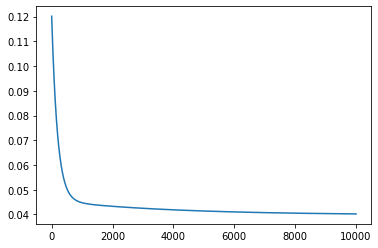

Weight values are [[ 0.30935364 -0.00213537  0.07563175 -0.00436494  0.05969564  0.02029401]] 

Mean Square Error is  0.26649453212321694 

Mean Absolute Error is  0.49999762946493737 

Correlation Coefficient is  [4.49539725e-05] 

For Polynomial Regression with Mini Batch Gradient Descent. 



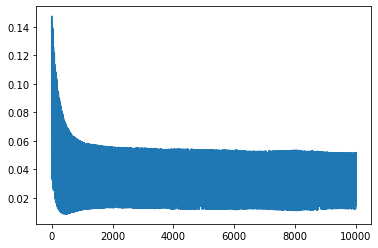

Weight values are [[0.26989725 0.004078   0.06871352 0.00032187 0.05266957 0.0186588 ]] 

Mean Square Error is  0.2778477513961096 

Mean Absolute Error is  0.5000632346252616 

Correlation Coefficient is  [-0.00123916] 

For Polynomial Regression with Stochastic Gradient Descent. 



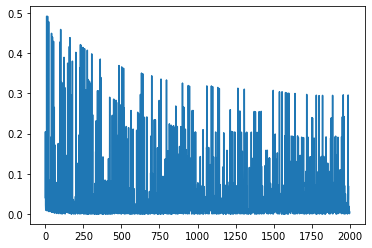

Weight values are [[0.18772743 0.0603307  0.08659637 0.05862342 0.07960671 0.06413322]] 

Mean Square Error is  0.2849820724093251 

Mean Absolute Error is  0.5008692428889882 

Correlation Coefficient is  [-0.00707249] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



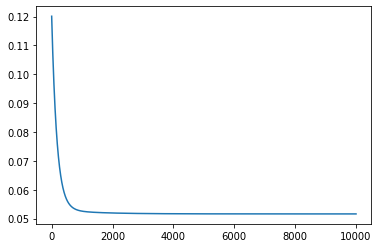

Weight values are [[0.19653433 0.04108563 0.07499512 0.03948721 0.06692832 0.04774619]] 

Mean Square Error is  0.28811402813834663 

Mean Absolute Error is  0.5005969438199274 

Correlation Coefficient is  [-0.00627424] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



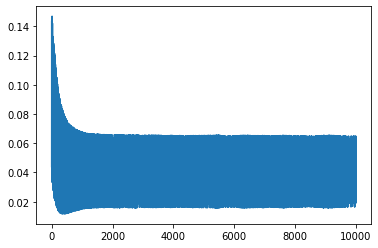

Weight values are [[0.17307349 0.03809333 0.06941193 0.03614247 0.06156777 0.04450054]] 

Mean Square Error is  0.2992501201008436 

Mean Absolute Error is  0.5005510010152916 

Correlation Coefficient is  [-0.00626737] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



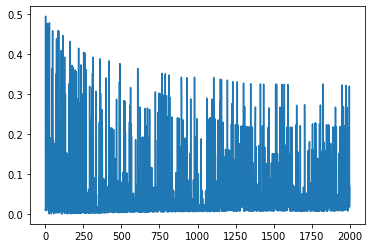

Weight values are [[0.16828256 0.06051739 0.08238297 0.05887129 0.07614145 0.06325595]] 

Mean Square Error is  0.291300074325269 

Mean Absolute Error is  0.5008703143504539 

Correlation Coefficient is  [-0.00725065] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



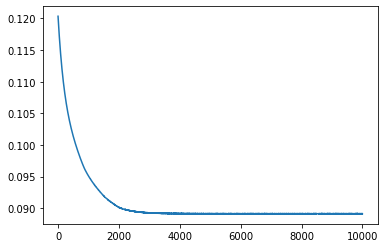

Weight values are [[ 2.50417027e-01  4.50876830e-06 -5.49303796e-05  7.42776073e-05
   1.47479406e-04 -5.69769047e-05]] 

Mean Square Error is  0.31226414814193165 

Mean Absolute Error is  0.5000003813509544 

Correlation Coefficient is  [-0.00948756] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



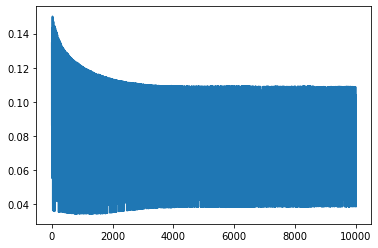

Weight values are [[ 2.10319457e-01 -2.58877269e-05 -1.11114943e-04  1.26362856e-04
   5.11172913e-05  6.06324363e-05]] 

Mean Square Error is  0.33388657078219636 

Mean Absolute Error is  0.5000007319001025 

Correlation Coefficient is  [-0.0207407] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



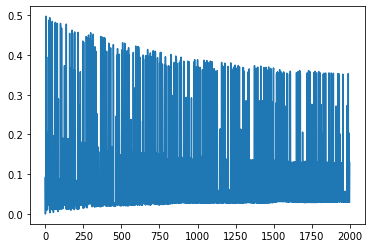

Weight values are [[1.94879764e-01 2.40744141e-05 2.82537434e-04 2.09962845e-04
  4.25808494e-05 2.39742618e-04]] 

Mean Square Error is  0.3428567614297664 

Mean Absolute Error is  0.5000019066449045 

Correlation Coefficient is  [-0.00678077] 

For alpha value  0.001 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



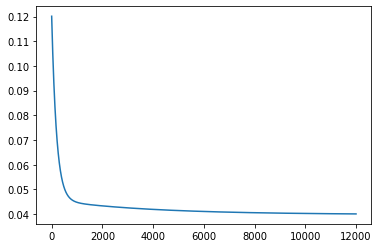

Weight values are [[ 0.32321756 -0.01073174  0.0754174  -0.01297218  0.05802445  0.01582349]] 

Mean Square Error is  0.2651226844533211 

Mean Absolute Error is  0.49988100740285546 

Correlation Coefficient is  [0.00267485] 

For Polynomial Regression with Mini Batch Gradient Descent. 



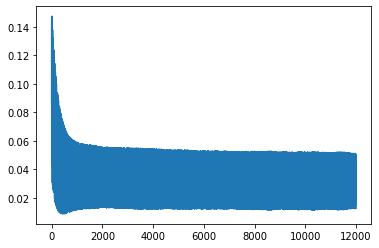

Weight values are [[ 0.28319148 -0.00139679  0.06819019 -0.005558    0.05048552  0.0142766 ]] 

Mean Square Error is  0.27589366507703933 

Mean Absolute Error is  0.4999835981595485 

Correlation Coefficient is  [0.00036804] 

For Polynomial Regression with Stochastic Gradient Descent. 



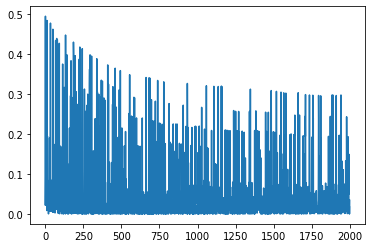

Weight values are [[0.18924068 0.06070785 0.08658619 0.05895848 0.0794149  0.06401211]] 

Mean Square Error is  0.28454847810653233 

Mean Absolute Error is  0.5008734970728382 

Correlation Coefficient is  [-0.00709933] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



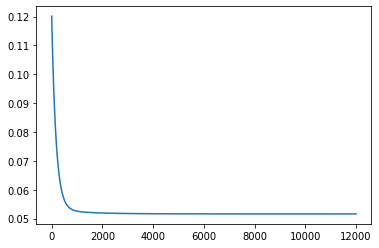

Weight values are [[0.19705998 0.04076075 0.07498611 0.03916186 0.06686445 0.04757617]] 

Mean Square Error is  0.2880251996000928 

Mean Absolute Error is  0.5005925339125863 

Correlation Coefficient is  [-0.00624843] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



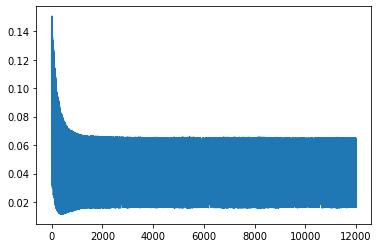

Weight values are [[0.17239597 0.03736799 0.06869207 0.03541677 0.06082823 0.04376101]] 

Mean Square Error is  0.3000351663755527 

Mean Absolute Error is  0.5005404804239881 

Correlation Coefficient is  [-0.00623877] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



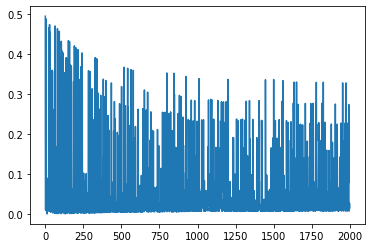

Weight values are [[0.16078058 0.05806728 0.07866007 0.05650384 0.07272679 0.06052118]] 

Mean Square Error is  0.2950560976221421 

Mean Absolute Error is  0.5008348500347845 

Correlation Coefficient is  [-0.00726823] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



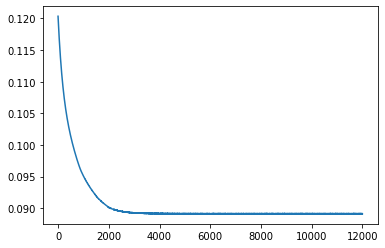

Weight values are [[ 2.50429756e-01 -1.05581949e-05  4.21052300e-05  1.66824634e-04
   1.15350592e-04 -6.98327672e-06]] 

Mean Square Error is  0.31221006072992774 

Mean Absolute Error is  0.5000009527800364 

Correlation Coefficient is  [-0.00883694] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



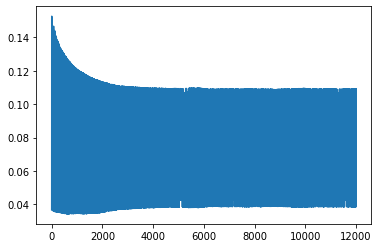

Weight values are [[2.08760964e-01 2.79089621e-04 3.05853522e-05 2.27129646e-04
  3.00080433e-04 4.52734768e-05]] 

Mean Square Error is  0.33456633737375796 

Mean Absolute Error is  0.5000032737532176 

Correlation Coefficient is  [-0.01057202] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



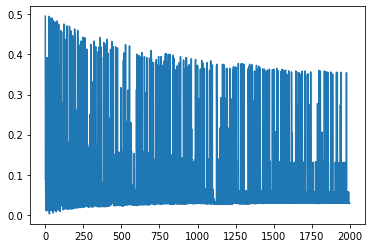

Weight values are [[ 1.88916941e-01 -1.02455433e-04 -1.90334569e-06 -3.80799368e-05
   1.53342532e-04 -8.58730867e-05]] 

Mean Square Error is  0.346797111044005 

Mean Absolute Error is  0.49999894810162626 

Correlation Coefficient is  [0.04058384] 

For alpha value  0.001 , lambda value  0.3 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



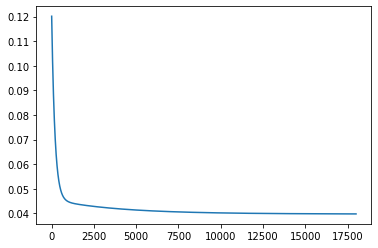

Weight values are [[ 0.34794416 -0.02837169  0.07699364 -0.03049289  0.05607922  0.0090456 ]] 

Mean Square Error is  0.2630495030529989 

Mean Absolute Error is  0.4996470939781899 

Correlation Coefficient is  [0.01188187] 

For Polynomial Regression with Mini Batch Gradient Descent. 



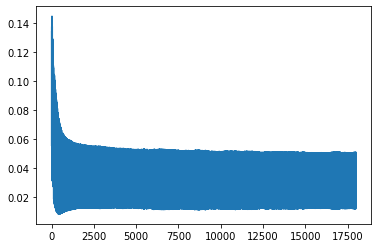

Weight values are [[ 0.30462238 -0.01281591  0.06598457 -0.01808434  0.04411849  0.00459698]] 

Mean Square Error is  0.27455423797810175 

Mean Absolute Error is  0.4998148526831381 

Correlation Coefficient is  [0.00622025] 

For Polynomial Regression with Stochastic Gradient Descent. 



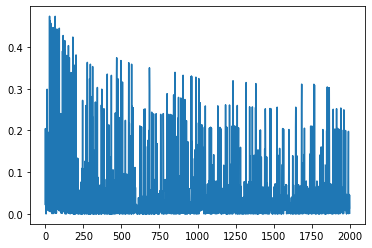

Weight values are [[0.18253765 0.05970965 0.08304019 0.05789834 0.07589671 0.06144773]] 

Mean Square Error is  0.28709482568454386 

Mean Absolute Error is  0.5008557196124411 

Correlation Coefficient is  [-0.0071958] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



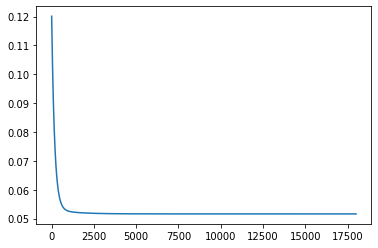

Weight values are [[0.19740997 0.040519   0.07500165 0.03892128 0.06683352 0.04747605]] 

Mean Square Error is  0.2879664979487516 

Mean Absolute Error is  0.5005893117013435 

Correlation Coefficient is  [-0.00622819] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



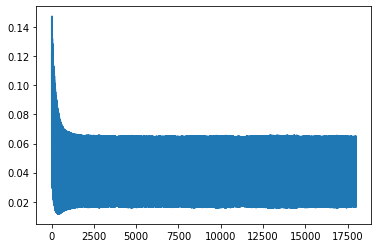

Weight values are [[0.17276176 0.0371269  0.06873082 0.03515505 0.06080773 0.04364748]] 

Mean Square Error is  0.29997000511775007 

Mean Absolute Error is  0.5005371061313071 

Correlation Coefficient is  [-0.00621483] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



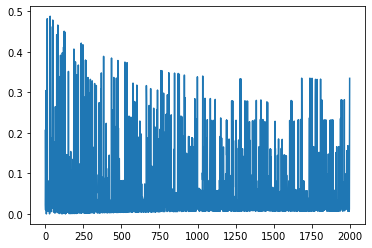

Weight values are [[0.15265348 0.05443371 0.07453381 0.05298424 0.06900384 0.05713555]] 

Mean Square Error is  0.2999645387469455 

Mean Absolute Error is  0.5007834667326609 

Correlation Coefficient is  [-0.00722778] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



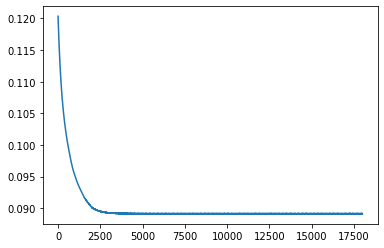

Weight values are [[ 2.50431545e-01  2.25752774e-04  1.22237970e-05  1.26307275e-04
  -9.76017885e-07  1.25040463e-04]] 

Mean Square Error is  0.31216339695002254 

Mean Absolute Error is  0.5000024593164406 

Correlation Coefficient is  [-0.01438216] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



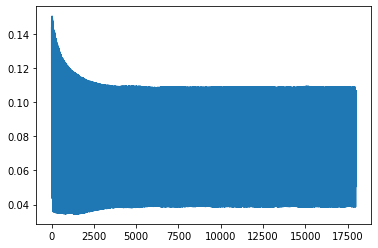

Weight values are [[ 2.08997542e-01  7.60523487e-06  1.63422470e-04 -1.01305233e-04
  -3.50188922e-05  2.99079802e-06]] 

Mean Square Error is  0.33467094649992263 

Mean Absolute Error is  0.4999994266796063 

Correlation Coefficient is  [0.04170251] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



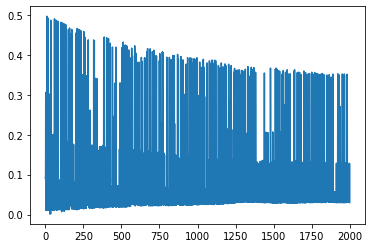

Weight values are [[0.19788965 0.00019949 0.00217389 0.0002428  0.00025412 0.00020275]] 

Mean Square Error is  0.3403491271203759 

Mean Absolute Error is  0.5000031598611507 

Correlation Coefficient is  [-0.00291413] 

For alpha value  0.001 , lambda value  0.5 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



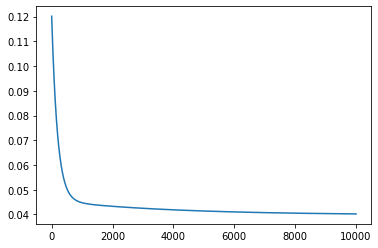

Weight values are [[ 0.30935364 -0.00213537  0.07563175 -0.00436494  0.05969564  0.02029401]] 

Mean Square Error is  0.26649453212321694 

Mean Absolute Error is  0.49999762946493737 

Correlation Coefficient is  [4.49539725e-05] 

For Polynomial Regression with Mini Batch Gradient Descent. 



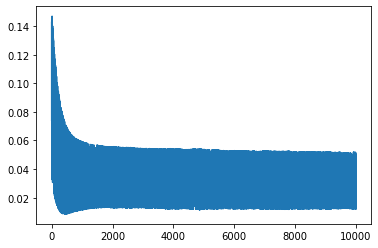

Weight values are [[ 0.27065278  0.00342754  0.06802739 -0.00035177  0.05188303  0.01778478]] 

Mean Square Error is  0.2780508722995697 

Mean Absolute Error is  0.5000532607619264 

Correlation Coefficient is  [-0.0010708] 

For Polynomial Regression with Stochastic Gradient Descent. 



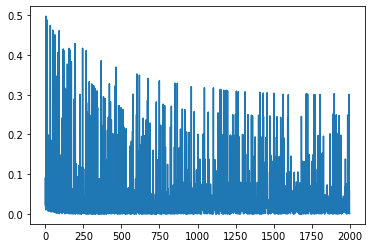

Weight values are [[0.18282859 0.05897681 0.08377384 0.05719441 0.07675608 0.06188608]] 

Mean Square Error is  0.2869722738187631 

Mean Absolute Error is  0.5008475087806756 

Correlation Coefficient is  [-0.00711384] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



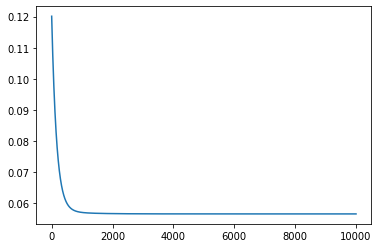

Weight values are [[0.16708126 0.04705319 0.07191314 0.04565414 0.06556894 0.05095551]] 

Mean Square Error is  0.2975589536333768 

Mean Absolute Error is  0.5006792903231654 

Correlation Coefficient is  [-0.00686566] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



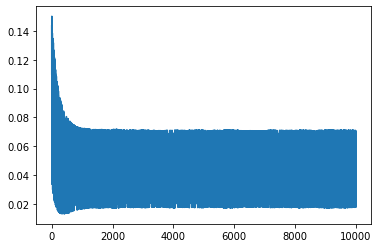

Weight values are [[0.14611545 0.04213135 0.06583462 0.04058756 0.05981067 0.04675816]] 

Mean Square Error is  0.31000180295448043 

Mean Absolute Error is  0.5006085699097075 

Correlation Coefficient is  [-0.00677786] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



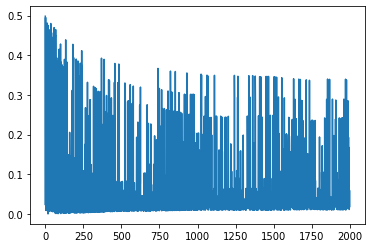

Weight values are [[0.15720269 0.05753412 0.07652999 0.05613391 0.07096666 0.05922302]] 

Mean Square Error is  0.29692829427283274 

Mean Absolute Error is  0.5008267056823223 

Correlation Coefficient is  [-0.0073345] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



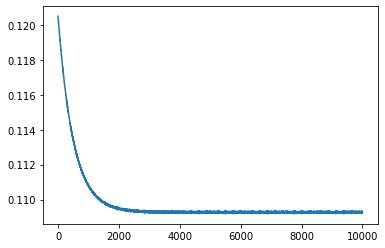

Weight values are [[ 1.50281321e-01  2.86979917e-04  2.78345437e-05 -9.31643970e-05
   3.56530567e-04  3.32936820e-04]] 

Mean Square Error is  0.37198917534825354 

Mean Absolute Error is  0.5000018829910086 

Correlation Coefficient is  [-0.00586856] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



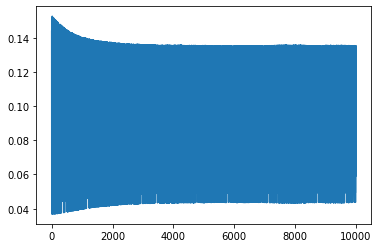

Weight values are [[ 1.12766748e-01  2.12766268e-04  1.66373910e-04  5.96016183e-05
   1.10381429e-04 -9.47933322e-06]] 

Mean Square Error is  0.39974105391179404 

Mean Absolute Error is  0.5000017093804842 

Correlation Coefficient is  [-0.00901519] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



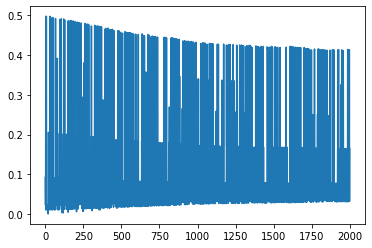

Weight values are [[0.12515639 0.00068181 0.00083642 0.00055905 0.00081651 0.00047041]] 

Mean Square Error is  0.3892603193764117 

Mean Absolute Error is  0.5000087026211529 

Correlation Coefficient is  [-0.00735323] 

For alpha value  0.001 , lambda value  0.5 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



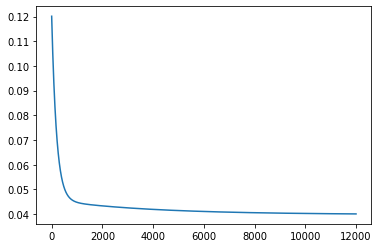

Weight values are [[ 0.32321756 -0.01073174  0.0754174  -0.01297218  0.05802445  0.01582349]] 

Mean Square Error is  0.2651226844533211 

Mean Absolute Error is  0.49988100740285546 

Correlation Coefficient is  [0.00267485] 

For Polynomial Regression with Mini Batch Gradient Descent. 



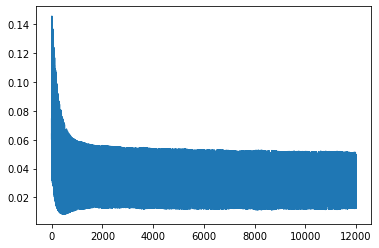

Weight values are [[ 0.28390699 -0.0015652   0.06781919 -0.00575522  0.05003202  0.01379067]] 

Mean Square Error is  0.27587444174093917 

Mean Absolute Error is  0.4999803845881098 

Correlation Coefficient is  [0.00044606] 

For Polynomial Regression with Stochastic Gradient Descent. 



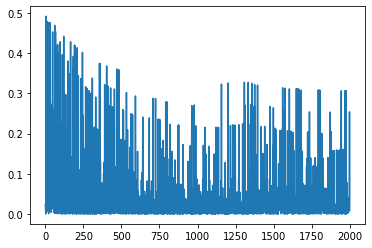

Weight values are [[0.17552287 0.05829564 0.0834215  0.05665563 0.07690227 0.06258329]] 

Mean Square Error is  0.28924210182319343 

Mean Absolute Error is  0.500841139330394 

Correlation Coefficient is  [-0.00707542] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



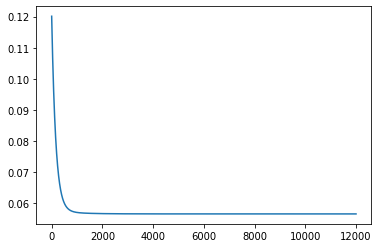

Weight values are [[0.16714151 0.04701603 0.07191204 0.04561691 0.06556158 0.05093598]] 

Mean Square Error is  0.2975480811403076 

Mean Absolute Error is  0.5006787856714289 

Correlation Coefficient is  [-0.00686304] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



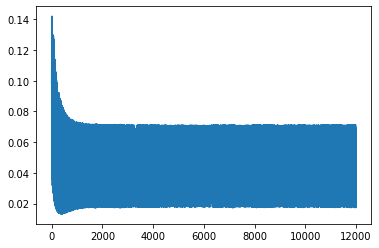

Weight values are [[0.14456369 0.04130772 0.06487143 0.0397824  0.05890354 0.04592728]] 

Mean Square Error is  0.311416637360464 

Mean Absolute Error is  0.5005967573832215 

Correlation Coefficient is  [-0.00676097] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



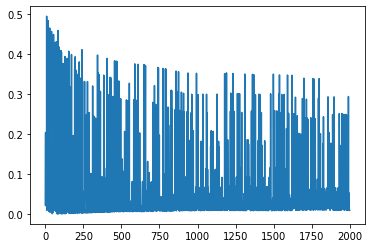

Weight values are [[0.14729167 0.05130173 0.07096116 0.04993134 0.06559185 0.05396841]] 

Mean Square Error is  0.30412511025279276 

Mean Absolute Error is  0.5007385882572752 

Correlation Coefficient is  [-0.00719514] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



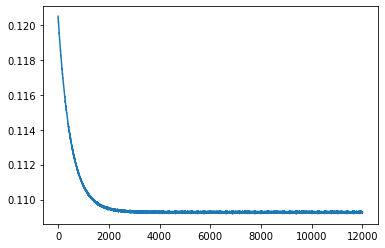

Weight values are [[ 1.50292532e-01  3.54787450e-04 -6.88696107e-05  7.03573929e-05
   8.69880683e-05 -2.58863941e-05]] 

Mean Square Error is  0.3721490963064547 

Mean Absolute Error is  0.500002651560628 

Correlation Coefficient is  [-0.01819066] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



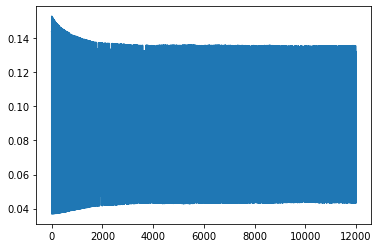

Weight values are [[ 1.09180073e-01  1.99990242e-05  1.90124016e-04  2.73830125e-04
  -3.96292070e-05  2.76231352e-04]] 

Mean Square Error is  0.40246007551451324 

Mean Absolute Error is  0.5000023450987408 

Correlation Coefficient is  [-0.00926193] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



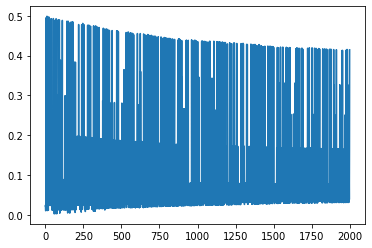

Weight values are [[1.24600812e-01 2.33083925e-05 1.97994510e-04 3.96302350e-04
  5.47523553e-04 5.05128472e-04]] 

Mean Square Error is  0.39030770303735474 

Mean Absolute Error is  0.5000035567967821 

Correlation Coefficient is  [-0.00604671] 

For alpha value  0.001 , lambda value  0.5 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



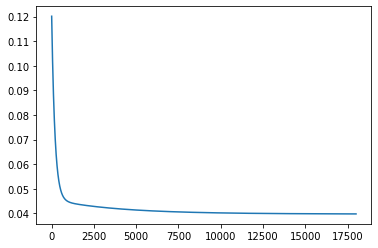

Weight values are [[ 0.34794416 -0.02837169  0.07699364 -0.03049289  0.05607922  0.0090456 ]] 

Mean Square Error is  0.2630495030529989 

Mean Absolute Error is  0.4996470939781899 

Correlation Coefficient is  [0.01188187] 

For Polynomial Regression with Mini Batch Gradient Descent. 



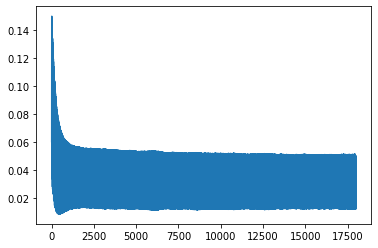

Weight values are [[ 0.30491387 -0.01247097  0.06615299 -0.01774518  0.04426212  0.00480285]] 

Mean Square Error is  0.27430808577108784 

Mean Absolute Error is  0.49981954373447446 

Correlation Coefficient is  [0.00597798] 

For Polynomial Regression with Stochastic Gradient Descent. 



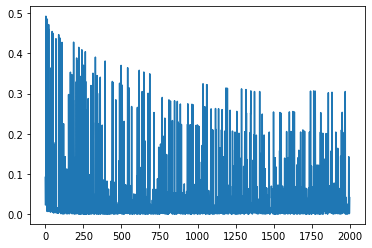

Weight values are [[0.17716658 0.05618324 0.08068501 0.05453017 0.07399027 0.05938054]] 

Mean Square Error is  0.289681852239133 

Mean Absolute Error is  0.5008084463645115 

Correlation Coefficient is  [-0.00707449] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



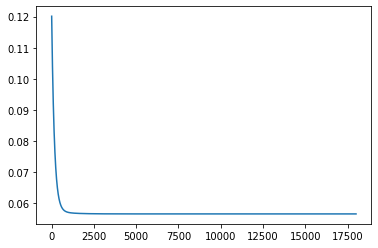

Weight values are [[0.16716445 0.04700043 0.07191285 0.04560138 0.06555945 0.05092929]] 

Mean Square Error is  0.2975439672770755 

Mean Absolute Error is  0.500678577263973 

Correlation Coefficient is  [-0.00686189] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



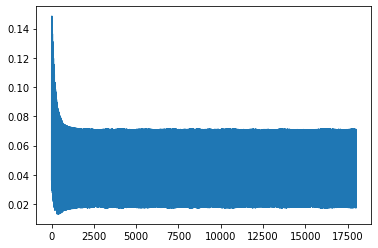

Weight values are [[0.14505224 0.04161527 0.06521264 0.04007788 0.05921091 0.04622849]] 

Mean Square Error is  0.31093655277220594 

Mean Absolute Error is  0.5006011191353571 

Correlation Coefficient is  [-0.00676852] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



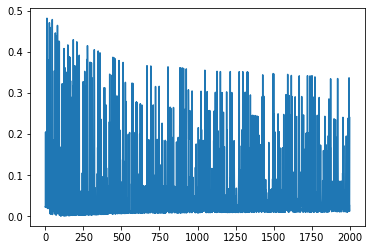

Weight values are [[0.15543095 0.05683138 0.07439456 0.0554624  0.06886238 0.05743656]] 

Mean Square Error is  0.2983555103410465 

Mean Absolute Error is  0.5008146893802207 

Correlation Coefficient is  [-0.00739912] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



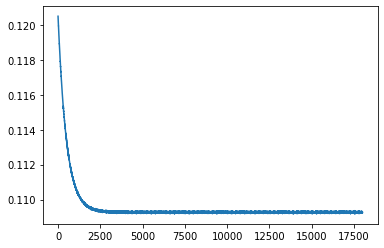

Weight values are [[1.50290595e-01 3.67970888e-05 1.15392597e-04 3.98281616e-05
  2.53697789e-04 3.74761603e-04]] 

Mean Square Error is  0.37201451676734776 

Mean Absolute Error is  0.5000011887941864 

Correlation Coefficient is  [-0.0041087] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



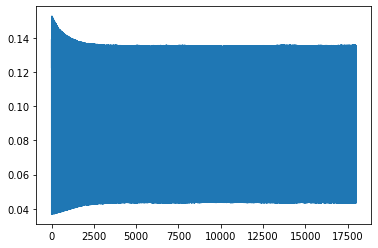

Weight values are [[1.09605042e-01 1.84775784e-04 3.31947876e-04 5.15516858e-05
  1.58452443e-05 2.58170333e-06]] 

Mean Square Error is  0.4021787284922815 

Mean Absolute Error is  0.5000015036150826 

Correlation Coefficient is  [-0.00728523] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



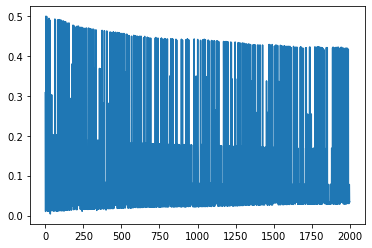

Weight values are [[1.18522332e-01 1.73760626e-04 1.06803548e-05 5.28095879e-06
  3.12368428e-04 8.99783196e-06]] 

Mean Square Error is  0.39533314303808476 

Mean Absolute Error is  0.500001158801722 

Correlation Coefficient is  [-0.0064411] 

For alpha value  0.001 , lambda value  0.01 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



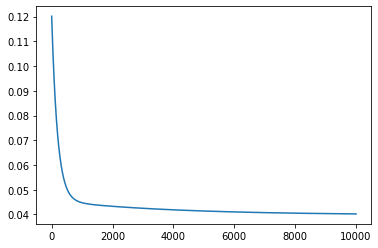

Weight values are [[ 0.30935364 -0.00213537  0.07563175 -0.00436494  0.05969564  0.02029401]] 

Mean Square Error is  0.26649453212321694 

Mean Absolute Error is  0.49999762946493737 

Correlation Coefficient is  [4.49539725e-05] 

For Polynomial Regression with Mini Batch Gradient Descent. 



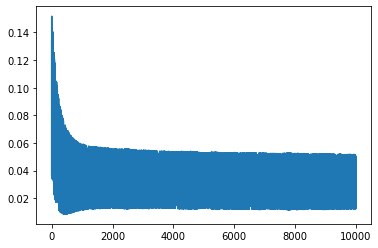

Weight values are [[2.71024235e-01 4.03841826e-03 6.86638536e-02 2.56346224e-04
  5.25320863e-02 1.84375103e-02]] 

Mean Square Error is  0.27755216591612636 

Mean Absolute Error is  0.5000621585083881 

Correlation Coefficient is  [-0.0012224] 

For Polynomial Regression with Stochastic Gradient Descent. 



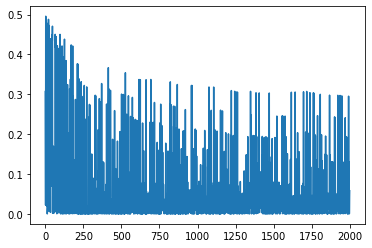

Weight values are [[0.18930025 0.06022689 0.08624169 0.05830387 0.07869724 0.06334607]] 

Mean Square Error is  0.2846681878040112 

Mean Absolute Error is  0.5008651154512285 

Correlation Coefficient is  [-0.00708922] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



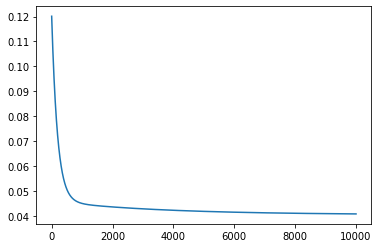

Weight values are [[ 0.30245598  0.00095974  0.07580966 -0.00123503  0.06038825  0.0222814 ]] 

Mean Square Error is  0.2674298854326199 

Mean Absolute Error is  0.5000405232380665 

Correlation Coefficient is  [-0.00072475] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



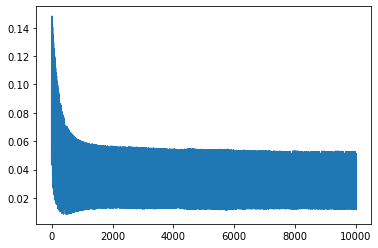

Weight values are [[0.26258751 0.00543284 0.06776969 0.00181294 0.05231211 0.0194162 ]] 

Mean Square Error is  0.2799318524930565 

Mean Absolute Error is  0.5000825479047295 

Correlation Coefficient is  [-0.00159264] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



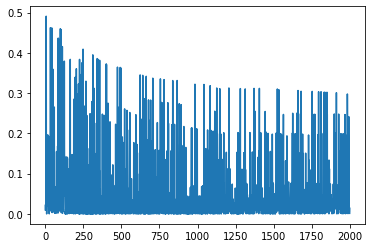

Weight values are [[0.18745443 0.06061073 0.08699957 0.05892273 0.0800568  0.06461868]] 

Mean Square Error is  0.2849651648619787 

Mean Absolute Error is  0.5008738004024906 

Correlation Coefficient is  [-0.00707074] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



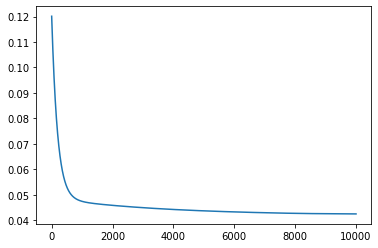

Weight values are [[ 3.14780546e-01 -1.34484459e-06  6.95670926e-02 -2.14388922e-08
   5.22969816e-02  1.15244118e-02]] 

Mean Square Error is  0.2664881785162058 

Mean Absolute Error is  0.5000217390481956 

Correlation Coefficient is  [-0.00046106] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



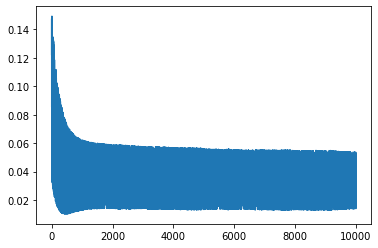

Weight values are [[2.78902359e-01 1.22731296e-05 6.54931737e-02 2.79594603e-06
  4.80899552e-02 1.26948906e-02]] 

Mean Square Error is  0.27720717698038194 

Mean Absolute Error is  0.5000240522383296 

Correlation Coefficient is  [-0.0005388] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



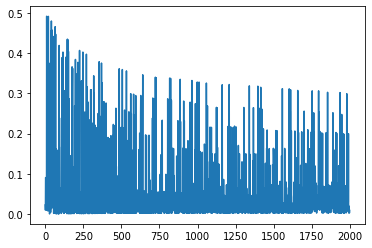

Weight values are [[0.1879112  0.05928427 0.08505436 0.05749971 0.07776824 0.06244246]] 

Mean Square Error is  0.28530101866512814 

Mean Absolute Error is  0.5008524123481878 

Correlation Coefficient is  [-0.00708244] 

For alpha value  0.001 , lambda value  0.01 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



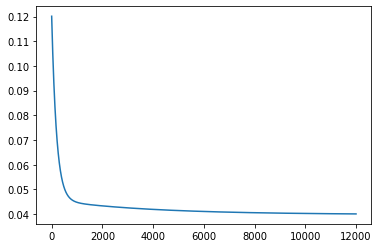

Weight values are [[ 0.32321756 -0.01073174  0.0754174  -0.01297218  0.05802445  0.01582349]] 

Mean Square Error is  0.2651226844533211 

Mean Absolute Error is  0.49988100740285546 

Correlation Coefficient is  [0.00267485] 

For Polynomial Regression with Mini Batch Gradient Descent. 



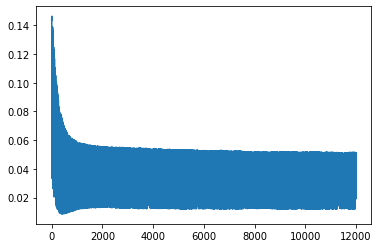

Weight values are [[ 0.28373829 -0.00195449  0.06736295 -0.00616239  0.04949896  0.01330804]] 

Mean Square Error is  0.2762034204202537 

Mean Absolute Error is  0.49997446688256214 

Correlation Coefficient is  [0.00059137] 

For Polynomial Regression with Stochastic Gradient Descent. 



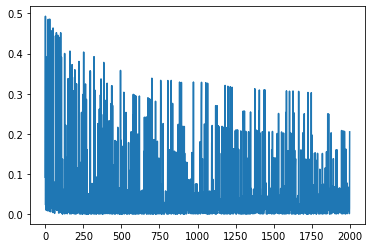

Weight values are [[0.17990582 0.05818223 0.08292714 0.05661234 0.07622738 0.06149053]] 

Mean Square Error is  0.2880541236673451 

Mean Absolute Error is  0.5008380851289479 

Correlation Coefficient is  [-0.00710068] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



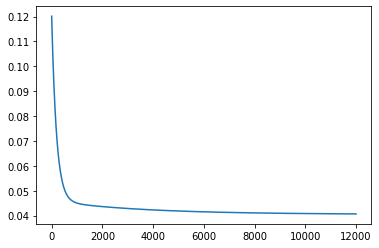

Weight values are [[ 0.31488143 -0.00674387  0.07561686 -0.00894844  0.05889005  0.01827431]] 

Mean Square Error is  0.26613852701686974 

Mean Absolute Error is  0.4999360108162804 

Correlation Coefficient is  [0.00131876] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



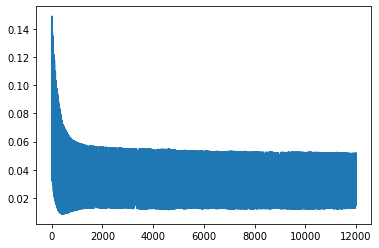

Weight values are [[ 0.27721204  0.00174536  0.0684732  -0.00230508  0.05133909  0.01640417]] 

Mean Square Error is  0.2765946073928073 

Mean Absolute Error is  0.5000278187526804 

Correlation Coefficient is  [-0.00058018] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



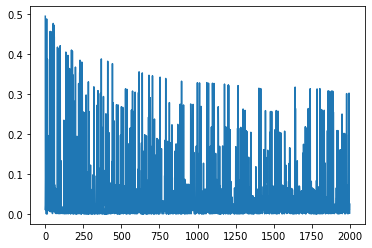

Weight values are [[0.1811869  0.05920706 0.08371959 0.05751712 0.0769155  0.06225336]] 

Mean Square Error is  0.2873975690663155 

Mean Absolute Error is  0.5008516705015088 

Correlation Coefficient is  [-0.00712725] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



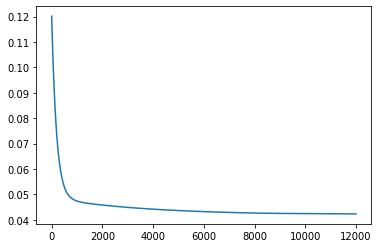

Weight values are [[ 3.25600359e-01 -3.41415801e-07  6.58085556e-02 -3.79122660e-07
   4.68869054e-02  2.80017303e-03]] 

Mean Square Error is  0.2654435646287562 

Mean Absolute Error is  0.5000052796904713 

Correlation Coefficient is  [-0.0001293] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



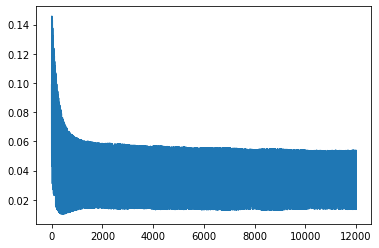

Weight values are [[ 2.87365937e-01 -1.20787554e-04  5.98576446e-02 -1.30603452e-04
   4.06939450e-02  2.92800988e-03]] 

Mean Square Error is  0.277460277449689 

Mean Absolute Error is  0.5000039454867156 

Correlation Coefficient is  [-0.0001081] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



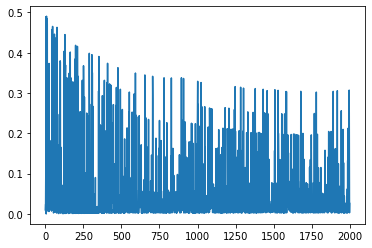

Weight values are [[0.18065444 0.05801896 0.07978639 0.05641873 0.0728841  0.05877396]] 

Mean Square Error is  0.2884894213563964 

Mean Absolute Error is  0.5008307171975492 

Correlation Coefficient is  [-0.0072454] 

For alpha value  0.001 , lambda value  0.01 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



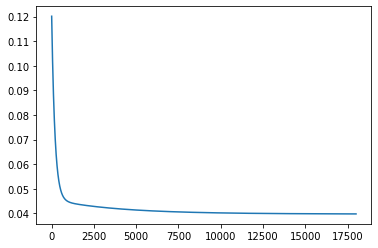

Weight values are [[ 0.34794416 -0.02837169  0.07699364 -0.03049289  0.05607922  0.0090456 ]] 

Mean Square Error is  0.2630495030529989 

Mean Absolute Error is  0.4996470939781899 

Correlation Coefficient is  [0.01188187] 

For Polynomial Regression with Mini Batch Gradient Descent. 



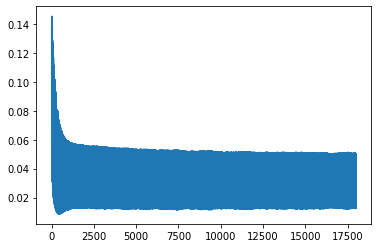

Weight values are [[ 0.30608699 -0.01214982  0.06669862 -0.01746407  0.04473151  0.00515632]] 

Mean Square Error is  0.2736973556926787 

Mean Absolute Error is  0.4998240019362024 

Correlation Coefficient is  [0.00569935] 

For Polynomial Regression with Stochastic Gradient Descent. 



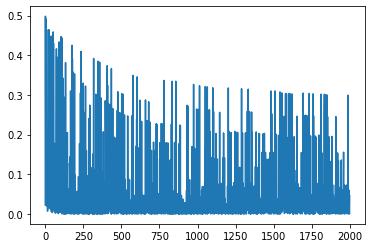

Weight values are [[0.18358738 0.0587835  0.0846143  0.05718574 0.07786755 0.06270129]] 

Mean Square Error is  0.28659568667080604 

Mean Absolute Error is  0.5008477595962046 

Correlation Coefficient is  [-0.00706219] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



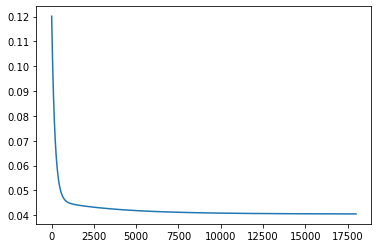

Weight values are [[ 0.33625303 -0.02197201  0.07696353 -0.0240747   0.05720092  0.01240636]] 

Mean Square Error is  0.26420203005138865 

Mean Absolute Error is  0.49973404089492124 

Correlation Coefficient is  [0.00744125] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



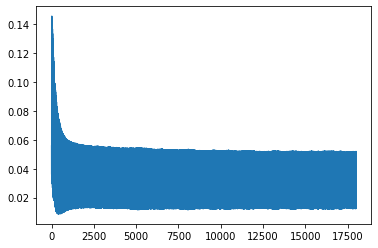

Weight values are [[ 0.29378227 -0.00841045  0.06633144 -0.01335144  0.04577266  0.00809141]] 

Mean Square Error is  0.2760340472264934 

Mean Absolute Error is  0.49987888365710803 

Correlation Coefficient is  [0.00347108] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



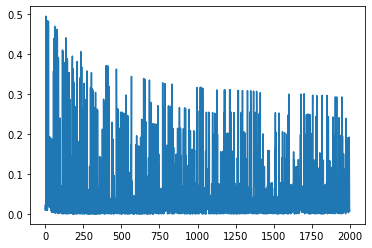

Weight values are [[0.1939589  0.05808608 0.08627687 0.05630837 0.0788666  0.06233455]] 

Mean Square Error is  0.28363567518372157 

Mean Absolute Error is  0.5008371812234861 

Correlation Coefficient is  [-0.00695889] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



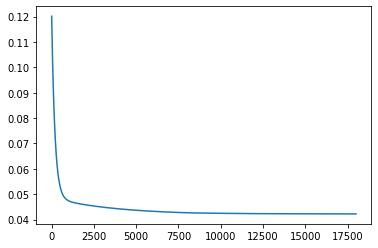

Weight values are [[ 3.43187447e-01 -3.35397691e-06  5.60265586e-02  2.55923246e-06
   3.27297436e-02  5.23370910e-06]] 

Mean Square Error is  0.2637334299822239 

Mean Absolute Error is  0.5000000043206774 

Correlation Coefficient is  [-1.37670486e-07] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



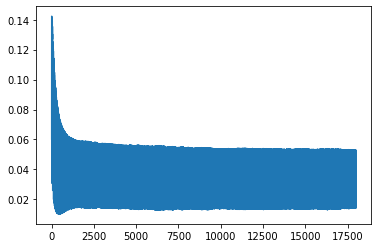

Weight values are [[ 3.08171324e-01 -1.64051310e-04  5.22110553e-02 -1.59430357e-04
   2.81119648e-02 -5.92442396e-05]] 

Mean Square Error is  0.27398336850975474 

Mean Absolute Error is  0.4999978535148742 

Correlation Coefficient is  [7.59367841e-05] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



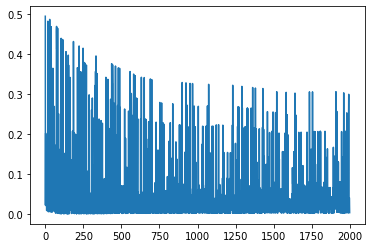

Weight values are [[0.18903183 0.05670973 0.08134068 0.05483387 0.07394947 0.05834818]] 

Mean Square Error is  0.2859801469193242 

Mean Absolute Error is  0.5008117399638266 

Correlation Coefficient is  [-0.0070944] 

For alpha value  0.1 , lambda value  0.3 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



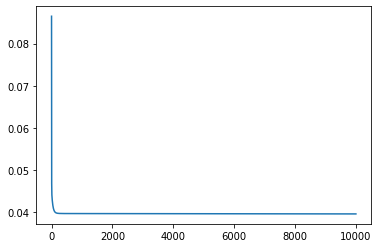

Weight values are [[ 0.37766772 -0.10225171  0.1954539  -0.04984524 -0.16184568  0.15364924]] 

Mean Square Error is  0.260504046347048 

Mean Absolute Error is  0.4993285285282048 

Correlation Coefficient is  [0.0518078] 

For Polynomial Regression with Mini Batch Gradient Descent. 



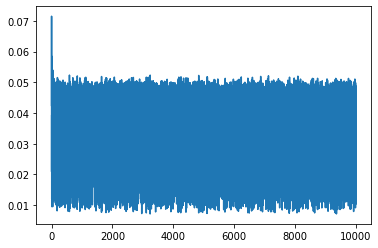

Weight values are [[ 0.31483571  0.05725184  0.30497646 -0.09496333 -0.18464128 -0.00245952]] 

Mean Square Error is  0.27082401849138416 

Mean Absolute Error is  0.49977257072595344 

Correlation Coefficient is  [0.00795169] 

For Polynomial Regression with Stochastic Gradient Descent. 



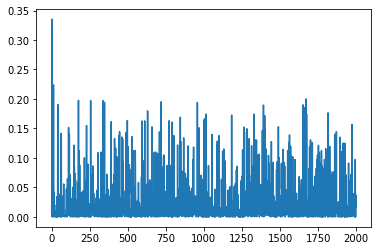

Weight values are [[0.27352801 0.00137696 0.1413401  0.00536213 0.05033468 0.0860075 ]] 

Mean Square Error is  0.26757794907749677 

Mean Absolute Error is  0.5002043085408241 

Correlation Coefficient is  [-0.00203433] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



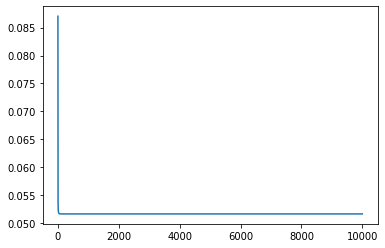

Weight values are [[0.19743727 0.0404933  0.07500882 0.03889619 0.06683367 0.04747205]] 

Mean Square Error is  0.28796200807979483 

Mean Absolute Error is  0.500588984687963 

Correlation Coefficient is  [-0.00622582] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



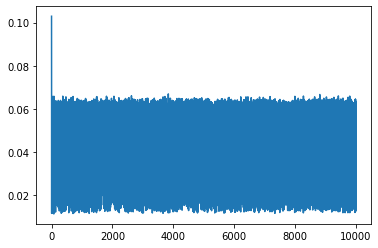

Weight values are [[0.16523285 0.03385406 0.06467226 0.0320114  0.05711308 0.04039031]] 

Mean Square Error is  0.3058185359717961 

Mean Absolute Error is  0.5004905965555335 

Correlation Coefficient is  [-0.00611004] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



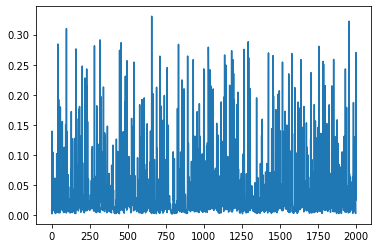

Weight values are [[0.20887908 0.05884726 0.08938826 0.05644043 0.08013451 0.06256108]] 

Mean Square Error is  0.279642499204544 

Mean Absolute Error is  0.5008432853826459 

Correlation Coefficient is  [-0.00689839] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



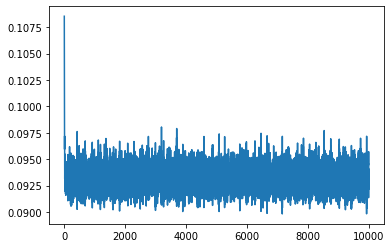

Weight values are [[ 0.23017315 -0.0082928   0.01618818  0.01292684  0.01172254  0.01149813]] 

Mean Square Error is  0.3118235625610665 

Mean Absolute Error is  0.5000488372376306 

Correlation Coefficient is  [-0.00314218] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



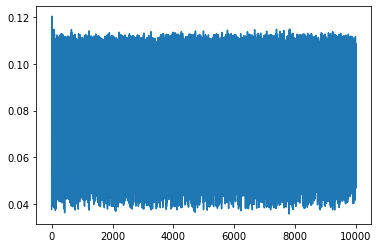

Weight values are [[ 0.19690281  0.01433205  0.00742795 -0.00075256  0.0129817  -0.00709695]] 

Mean Square Error is  0.3340378918579496 

Mean Absolute Error is  0.5000734270013033 

Correlation Coefficient is  [-0.00776537] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



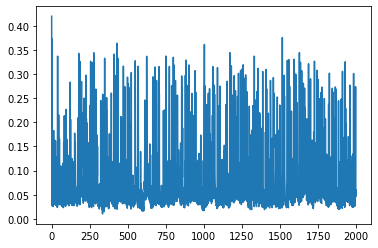

Weight values are [[0.17672988 0.00579737 0.02868973 0.00684397 0.02506715 0.01609116]] 

Mean Square Error is  0.33067380602702323 

Mean Absolute Error is  0.5001097633529916 

Correlation Coefficient is  [-0.00377295] 

For alpha value  0.1 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



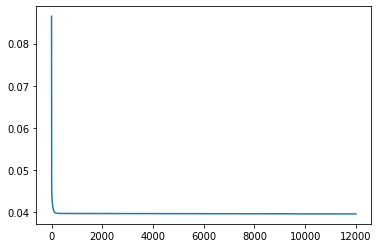

Weight values are [[ 0.38012042 -0.11135768  0.21564878 -0.04768585 -0.20713691  0.18255864]] 

Mean Square Error is  0.26021747990736155 

Mean Absolute Error is  0.49933833614729045 

Correlation Coefficient is  [0.05575566] 

For Polynomial Regression with Mini Batch Gradient Descent. 



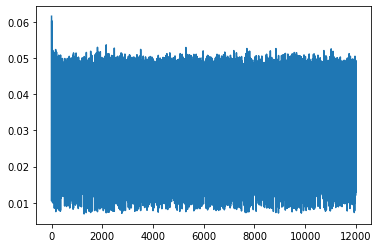

Weight values are [[ 0.31024123  0.07123996  0.34992235 -0.10767982 -0.22835332 -0.00277383]] 

Mean Square Error is  0.2716729387272633 

Mean Absolute Error is  0.4997824945600586 

Correlation Coefficient is  [0.00739236] 

For Polynomial Regression with Stochastic Gradient Descent. 



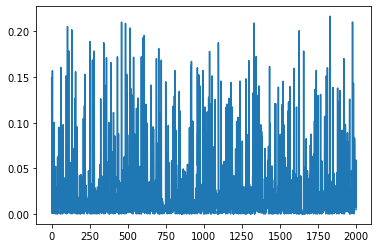

Weight values are [[0.42951603 0.01076792 0.10976989 0.00981782 0.01829102 0.03744217]] 

Mean Square Error is  0.25500957191801776 

Mean Absolute Error is  0.5002002025409489 

Correlation Coefficient is  [-0.00304917] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



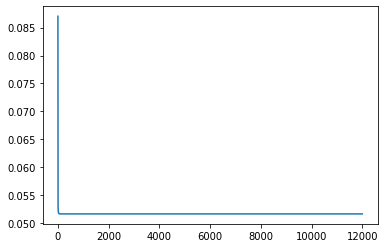

Weight values are [[0.19743727 0.0404933  0.07500882 0.03889619 0.06683367 0.04747205]] 

Mean Square Error is  0.28796200807979483 

Mean Absolute Error is  0.500588984687963 

Correlation Coefficient is  [-0.00622582] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



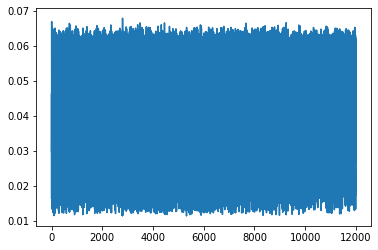

Weight values are [[0.16295289 0.03368794 0.06470614 0.03175621 0.0570737  0.04056096]] 

Mean Square Error is  0.30687446538003454 

Mean Absolute Error is  0.5004882775854397 

Correlation Coefficient is  [-0.0060879] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



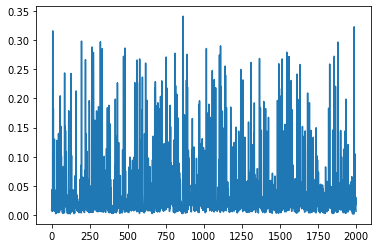

Weight values are [[0.16420022 0.03219087 0.0738266  0.03094989 0.06676716 0.04889118]] 

Mean Square Error is  0.30252670561658873 

Mean Absolute Error is  0.5004894473100783 

Correlation Coefficient is  [-0.00550016] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



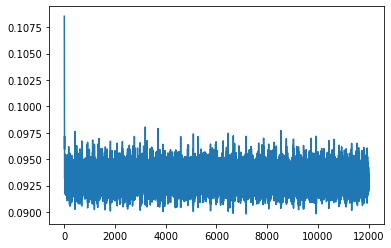

Weight values are [[ 0.22797658 -0.00468427  0.0150421  -0.00281132  0.01701404  0.01943156]] 

Mean Square Error is  0.3129599339952914 

Mean Absolute Error is  0.49998935576956355 

Correlation Coefficient is  [0.00068378] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



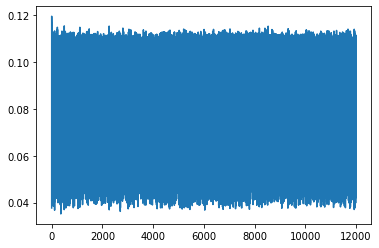

Weight values are [[ 0.20319059  0.00345693  0.01357114 -0.00171594  0.01006689  0.0209682 ]] 

Mean Square Error is  0.3253127141287596 

Mean Absolute Error is  0.5000510057994758 

Correlation Coefficient is  [-0.00311889] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



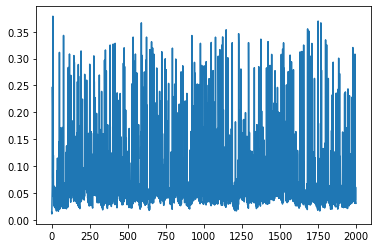

Weight values are [[ 0.16420012 -0.00659581  0.01311555 -0.003557   -0.00341544 -0.00363104]] 

Mean Square Error is  0.3641004318505703 

Mean Absolute Error is  0.499929014032839 

Correlation Coefficient is  [0.05074494] 

For alpha value  0.1 , lambda value  0.3 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



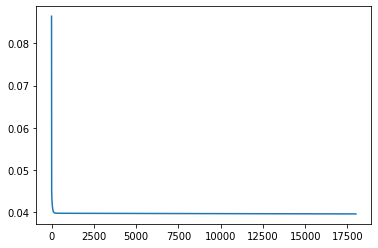

Weight values are [[ 0.38748477 -0.1387283   0.27392457 -0.04101704 -0.34002759  0.26852184]] 

Mean Square Error is  0.2593953743364632 

Mean Absolute Error is  0.4993671597491649 

Correlation Coefficient is  [0.07272753] 

For Polynomial Regression with Mini Batch Gradient Descent. 



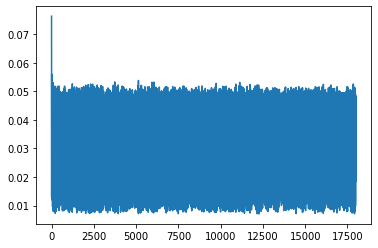

Weight values are [[ 0.29182999  0.10920586  0.48232864 -0.1540198  -0.36245803 -0.00686943]] 

Mean Square Error is  0.2786744089967318 

Mean Absolute Error is  0.499730060605221 

Correlation Coefficient is  [0.01089114] 

For Polynomial Regression with Stochastic Gradient Descent. 



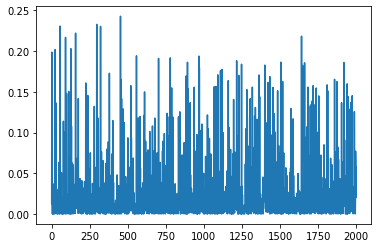

Weight values are [[ 0.42691735 -0.0278617   0.14534508 -0.02573845  0.05537271  0.06214803]] 

Mean Square Error is  0.2561714251556336 

Mean Absolute Error is  0.49978000913569093 

Correlation Coefficient is  [0.00296659] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



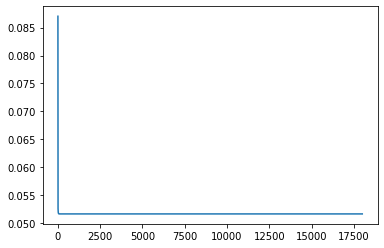

Weight values are [[0.19743727 0.0404933  0.07500882 0.03889619 0.06683367 0.04747205]] 

Mean Square Error is  0.28796200807979483 

Mean Absolute Error is  0.500588984687963 

Correlation Coefficient is  [-0.00622582] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



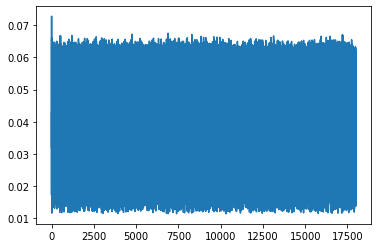

Weight values are [[0.17660061 0.0377079  0.0698327  0.03566374 0.06165071 0.04416786]] 

Mean Square Error is  0.2979275869303728 

Mean Absolute Error is  0.5005449476281502 

Correlation Coefficient is  [-0.00621555] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



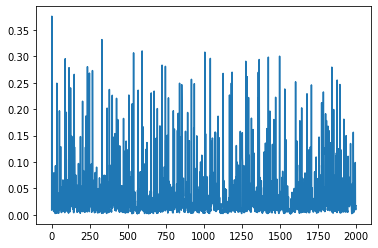

Weight values are [[0.10307964 0.04695318 0.06200001 0.04581273 0.05663761 0.05087623]] 

Mean Square Error is  0.32989228214894795 

Mean Absolute Error is  0.5006794847039415 

Correlation Coefficient is  [-0.00736408] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



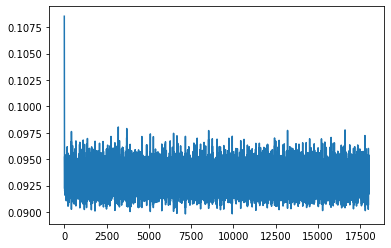

Weight values are [[0.23023425 0.01118634 0.01707371 0.01493956 0.00811785 0.01806844]] 

Mean Square Error is  0.3060291314594209 

Mean Absolute Error is  0.5001980383441271 

Correlation Coefficient is  [-0.00811695] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



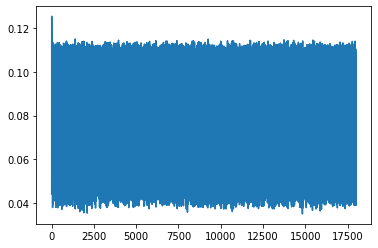

Weight values are [[ 0.18885634 -0.00474093  0.0247827   0.01808932  0.01789066  0.00798818]] 

Mean Square Error is  0.32865919816419764 

Mean Absolute Error is  0.5000968627265536 

Correlation Coefficient is  [-0.00429197] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



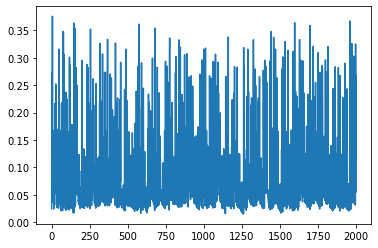

Weight values are [[ 0.27832758  0.00380272  0.00513855  0.00396348  0.0067659  -0.00032125]] 

Mean Square Error is  0.2950448112660782 

Mean Absolute Error is  0.5000482171430679 

Correlation Coefficient is  [-0.00708229] 

For alpha value  0.1 , lambda value  0.5 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



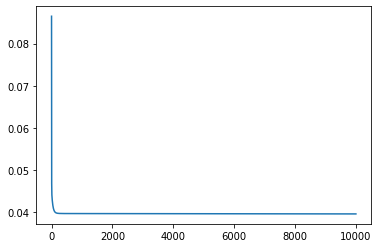

Weight values are [[ 0.37766772 -0.10225171  0.1954539  -0.04984524 -0.16184568  0.15364924]] 

Mean Square Error is  0.260504046347048 

Mean Absolute Error is  0.4993285285282048 

Correlation Coefficient is  [0.0518078] 

For Polynomial Regression with Mini Batch Gradient Descent. 



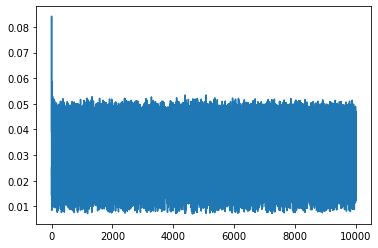

Weight values are [[ 0.30143233  0.04471317  0.29122897 -0.10165243 -0.1889974  -0.01192253]] 

Mean Square Error is  0.2818810298972353 

Mean Absolute Error is  0.4996332451332045 

Correlation Coefficient is  [0.02977859] 

For Polynomial Regression with Stochastic Gradient Descent. 



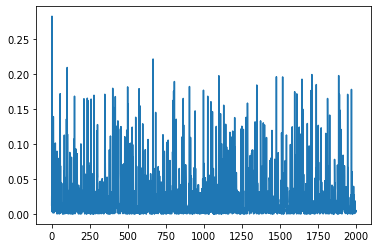

Weight values are [[ 0.2463891  -0.05489983  0.08314159 -0.05278815 -0.01654601  0.0205717 ]] 

Mean Square Error is  0.3195578046546361 

Mean Absolute Error is  0.4993614143398199 

Correlation Coefficient is  [0.09268466] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



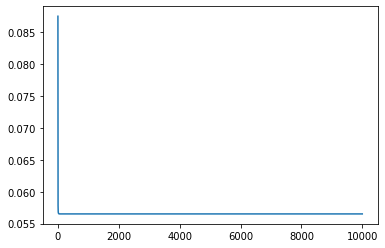

Weight values are [[0.16716497 0.04699997 0.07191297 0.04560093 0.06555944 0.0509292 ]] 

Mean Square Error is  0.2975438773652054 

Mean Absolute Error is  0.5006785713702799 

Correlation Coefficient is  [-0.00686185] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



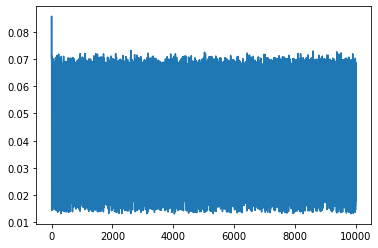

Weight values are [[0.13924251 0.04092089 0.06389504 0.03945561 0.0582758  0.04572283]] 

Mean Square Error is  0.3143293768025432 

Mean Absolute Error is  0.500591878184158 

Correlation Coefficient is  [-0.00677387] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



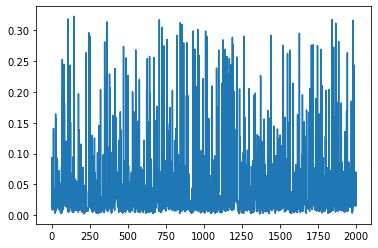

Weight values are [[0.19076507 0.07086022 0.10277598 0.06985603 0.09738626 0.08136036]] 

Mean Square Error is  0.28281280310986123 

Mean Absolute Error is  0.5010385393965169 

Correlation Coefficient is  [-0.00698966] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



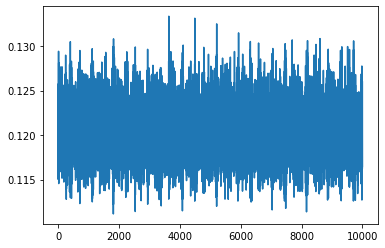

Weight values are [[ 1.14457391e-01 -3.29704556e-06 -4.14573363e-03 -3.92974066e-03
   2.18912685e-02 -3.58831978e-03]] 

Mean Square Error is  0.39495940915358135 

Mean Absolute Error is  0.4999688656858886 

Correlation Coefficient is  [0.00854195] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



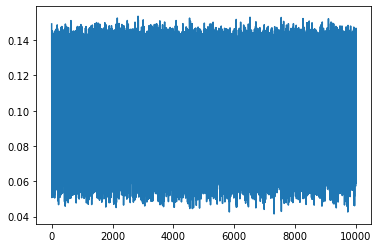

Weight values are [[0.06606789 0.0026993  0.0305224  0.03935925 0.02647474 0.01954266]] 

Mean Square Error is  0.3925195317422879 

Mean Absolute Error is  0.500297909055079 

Correlation Coefficient is  [-0.00713849] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



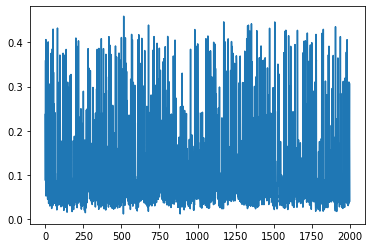

Weight values are [[0.15118311 0.04269254 0.06794543 0.0473777  0.06575498 0.08008066]] 

Mean Square Error is  0.3010936775490915 

Mean Absolute Error is  0.500717094686524 

Correlation Coefficient is  [-0.00670518] 

For alpha value  0.1 , lambda value  0.5 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



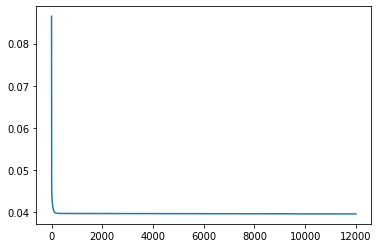

Weight values are [[ 0.38012042 -0.11135768  0.21564878 -0.04768585 -0.20713691  0.18255864]] 

Mean Square Error is  0.26021747990736155 

Mean Absolute Error is  0.49933833614729045 

Correlation Coefficient is  [0.05575566] 

For Polynomial Regression with Mini Batch Gradient Descent. 



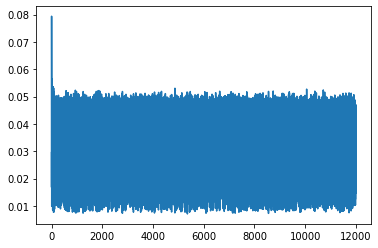

Weight values are [[ 0.32411037  0.07348476  0.35129117 -0.10778139 -0.2318761  -0.00308025]] 

Mean Square Error is  0.26786944152676057 

Mean Absolute Error is  0.4997956156735949 

Correlation Coefficient is  [0.00697354] 

For Polynomial Regression with Stochastic Gradient Descent. 



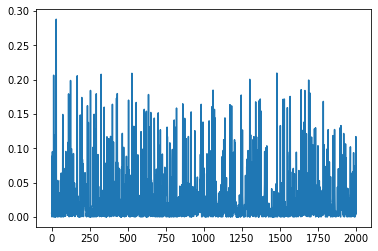

Weight values are [[ 0.34431523 -0.02710006  0.19835084 -0.03615195  0.07732885  0.10407345]] 

Mean Square Error is  0.26235738133986786 

Mean Absolute Error is  0.49979948469049473 

Correlation Coefficient is  [0.00178933] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



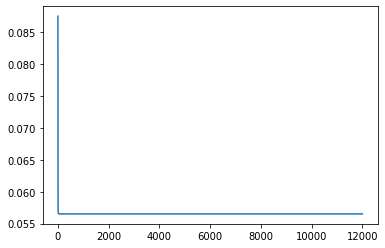

Weight values are [[0.16716497 0.04699997 0.07191297 0.04560093 0.06555944 0.0509292 ]] 

Mean Square Error is  0.2975438773652054 

Mean Absolute Error is  0.5006785713702799 

Correlation Coefficient is  [-0.00686185] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



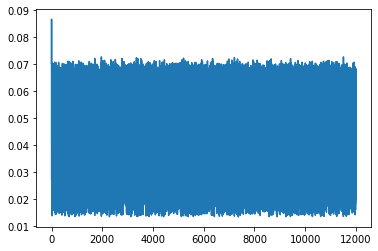

Weight values are [[0.15315228 0.04624443 0.07019543 0.04461272 0.06387029 0.05062402]] 

Mean Square Error is  0.3038803166100352 

Mean Absolute Error is  0.5006670516633573 

Correlation Coefficient is  [-0.00687899] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



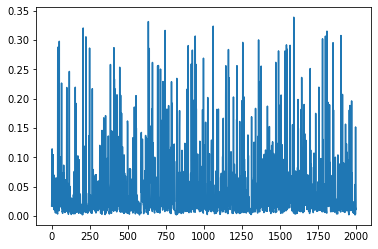

Weight values are [[0.11813054 0.04922243 0.06762912 0.04826604 0.06404122 0.05528221]] 

Mean Square Error is  0.31825804162817006 

Mean Absolute Error is  0.5007174802167031 

Correlation Coefficient is  [-0.00716907] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



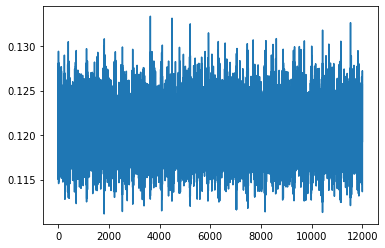

Weight values are [[0.11590298 0.00932925 0.0231668  0.01476434 0.01473822 0.02419234]] 

Mean Square Error is  0.367470274821443 

Mean Absolute Error is  0.500196655634588 

Correlation Coefficient is  [-0.00648142] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



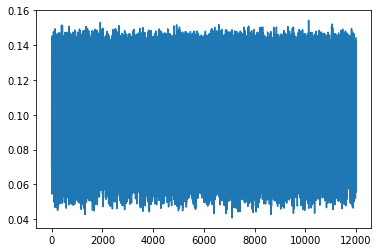

Weight values are [[ 0.06915657 -0.00174714  0.03971606  0.02373954  0.02579468  0.04007534]] 

Mean Square Error is  0.3872822158022278 

Mean Absolute Error is  0.5002115226578125 

Correlation Coefficient is  [-0.00470378] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



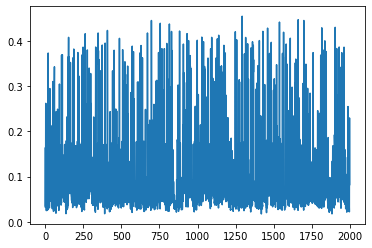

Weight values are [[0.03584087 0.05644003 0.02291494 0.06407244 0.06337794 0.06630307]] 

Mean Square Error is  0.3674359693389283 

Mean Absolute Error is  0.5008822560439121 

Correlation Coefficient is  [-0.00919361] 

For alpha value  0.1 , lambda value  0.5 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



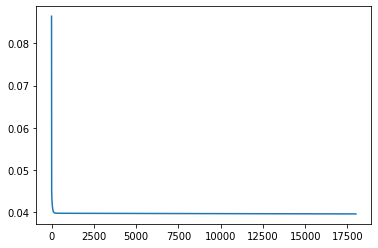

Weight values are [[ 0.38748477 -0.1387283   0.27392457 -0.04101704 -0.34002759  0.26852184]] 

Mean Square Error is  0.2593953743364632 

Mean Absolute Error is  0.4993671597491649 

Correlation Coefficient is  [0.07272753] 

For Polynomial Regression with Mini Batch Gradient Descent. 



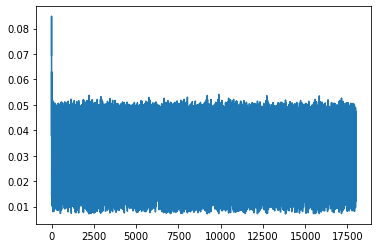

Weight values are [[ 3.17192115e-01  1.21247205e-01  4.93750985e-01 -1.46206664e-01
  -3.58157480e-01 -4.31447893e-04]] 

Mean Square Error is  0.2662561123648498 

Mean Absolute Error is  0.49986746574884827 

Correlation Coefficient is  [0.00336788] 

For Polynomial Regression with Stochastic Gradient Descent. 



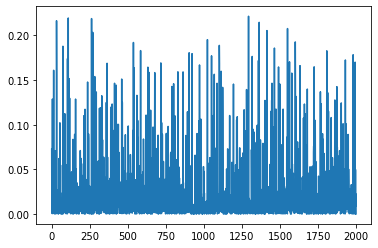

Weight values are [[ 0.3693804  -0.04224607  0.1179392  -0.05059336  0.011052    0.02913761]] 

Mean Square Error is  0.2598665527792057 

Mean Absolute Error is  0.49947194277134643 

Correlation Coefficient is  [0.02249448] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



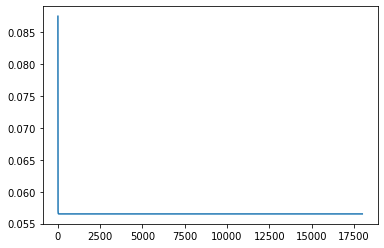

Weight values are [[0.16716497 0.04699997 0.07191297 0.04560093 0.06555944 0.0509292 ]] 

Mean Square Error is  0.2975438773652054 

Mean Absolute Error is  0.5006785713702799 

Correlation Coefficient is  [-0.00686185] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



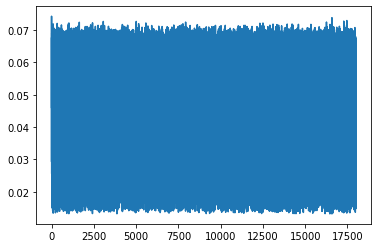

Weight values are [[0.14260141 0.04295054 0.06613889 0.0414239  0.06033895 0.04770103]] 

Mean Square Error is  0.3110478522815736 

Mean Absolute Error is  0.5006207585675533 

Correlation Coefficient is  [-0.00682207] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



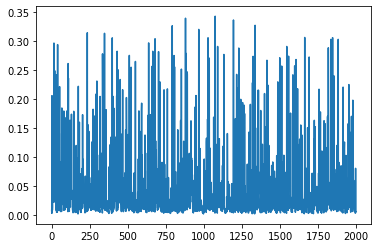

Weight values are [[0.10722924 0.01662658 0.03879352 0.01496645 0.0329731  0.02172575]] 

Mean Square Error is  0.3614004902621197 

Mean Absolute Error is  0.500239831513839 

Correlation Coefficient is  [-0.00544295] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



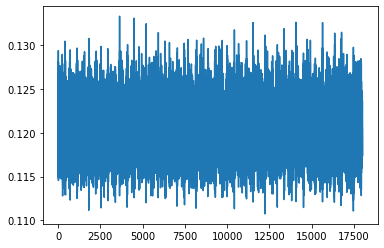

Weight values are [[ 0.11427552 -0.00223218  0.01181941  0.03134021  0.00045801  0.01709503]] 

Mean Square Error is  0.37764791333384584 

Mean Absolute Error is  0.5002121407280755 

Correlation Coefficient is  [-0.01033036] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



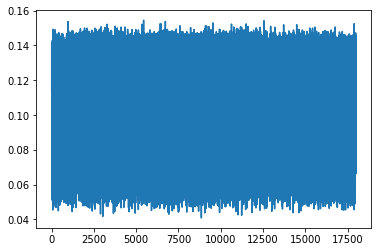

Weight values are [[ 0.08588772  0.02345863  0.03174473  0.01069355 -0.00425332  0.01997534]] 

Mean Square Error is  0.3901621165883966 

Mean Absolute Error is  0.5002536697837855 

Correlation Coefficient is  [-0.00884356] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



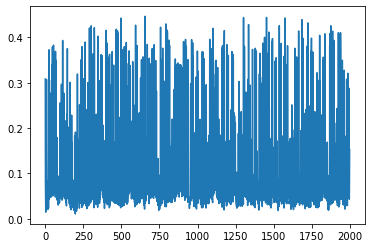

Weight values are [[0.10732949 0.03915463 0.03575555 0.02434237 0.02742249 0.04471808]] 

Mean Square Error is  0.3482964449494782 

Mean Absolute Error is  0.5004850932033843 

Correlation Coefficient is  [-0.00804897] 

For alpha value  0.1 , lambda value  0.01 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



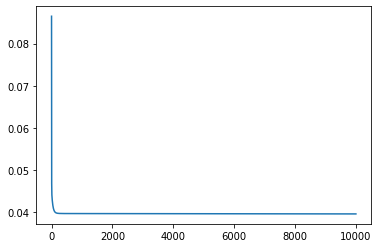

Weight values are [[ 0.37766772 -0.10225171  0.1954539  -0.04984524 -0.16184568  0.15364924]] 

Mean Square Error is  0.260504046347048 

Mean Absolute Error is  0.4993285285282048 

Correlation Coefficient is  [0.0518078] 

For Polynomial Regression with Mini Batch Gradient Descent. 



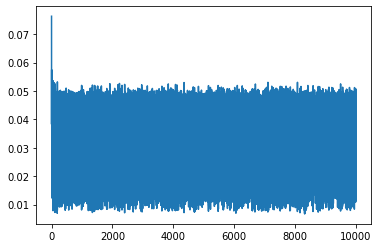

Weight values are [[ 0.29654191  0.04580174  0.29569627 -0.10238301 -0.18818454 -0.00782962]] 

Mean Square Error is  0.28200237105330167 

Mean Absolute Error is  0.49964339185877404 

Correlation Coefficient is  [0.02273622] 

For Polynomial Regression with Stochastic Gradient Descent. 



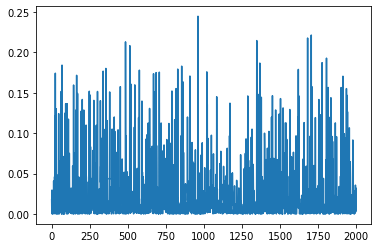

Weight values are [[ 0.35424594 -0.01942581  0.0950465  -0.02262821  0.00595338  0.02523264]] 

Mean Square Error is  0.26155745829838717 

Mean Absolute Error is  0.49978345762935455 

Correlation Coefficient is  [0.00723785] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



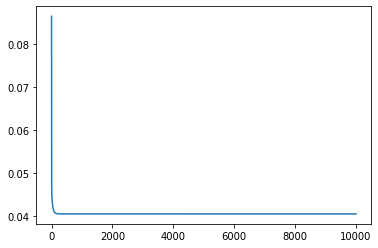

Weight values are [[ 0.3513081  -0.04685311  0.09527175 -0.04444571  0.04512059  0.02455703]] 

Mean Square Error is  0.2630763935128644 

Mean Absolute Error is  0.49947197210352484 

Correlation Coefficient is  [0.01996887] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



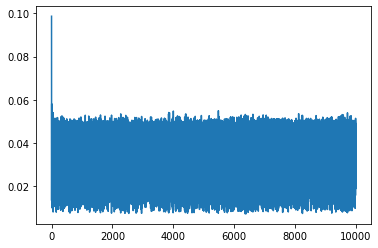

Weight values are [[ 0.30935529 -0.00928488  0.0877751  -0.02640699  0.0268097   0.00435442]] 

Mean Square Error is  0.27308398532326317 

Mean Absolute Error is  0.4997853809829083 

Correlation Coefficient is  [0.00725417] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



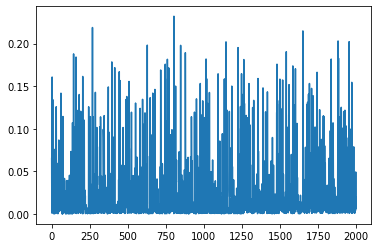

Weight values are [[ 0.41393922 -0.01070189  0.11609216 -0.0087112   0.0665555   0.04083962]] 

Mean Square Error is  0.2553799345935196 

Mean Absolute Error is  0.49995479946676563 

Correlation Coefficient is  [0.00062609] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



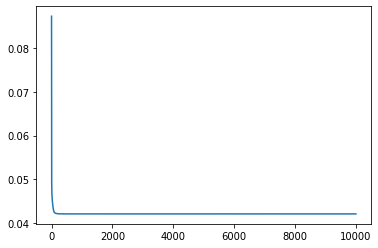

Weight values are [[ 3.64909516e-01 -6.16076574e-04  5.27064489e-02  2.13538423e-04
   6.25650379e-04  5.16836763e-04]] 

Mean Square Error is  0.2621030060541464 

Mean Absolute Error is  0.4999983656282434 

Correlation Coefficient is  [8.64865532e-05] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



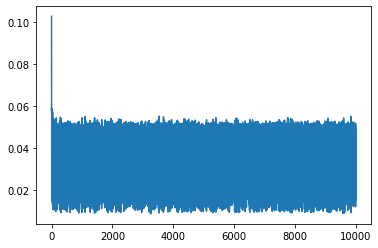

Weight values are [[0.34892568 0.00598871 0.01888511 0.00550126 0.01101954 0.00879805]] 

Mean Square Error is  0.2662931857162041 

Mean Absolute Error is  0.5000889047021795 

Correlation Coefficient is  [-0.00502689] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



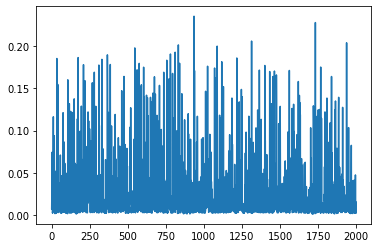

Weight values are [[0.31157121 0.01941089 0.0642985  0.01889138 0.05996746 0.05868694]] 

Mean Square Error is  0.26260752970728496 

Mean Absolute Error is  0.5003516652972089 

Correlation Coefficient is  [-0.00450891] 

For alpha value  0.1 , lambda value  0.01 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



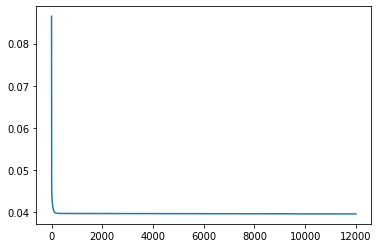

Weight values are [[ 0.38012042 -0.11135768  0.21564878 -0.04768585 -0.20713691  0.18255864]] 

Mean Square Error is  0.26021747990736155 

Mean Absolute Error is  0.49933833614729045 

Correlation Coefficient is  [0.05575566] 

For Polynomial Regression with Mini Batch Gradient Descent. 



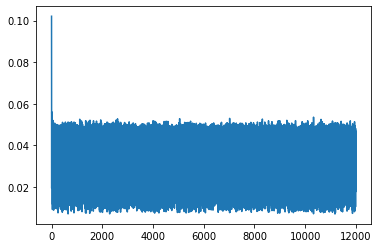

Weight values are [[ 0.31614098  0.06683137  0.34408319 -0.11294538 -0.23631814 -0.0098499 ]] 

Mean Square Error is  0.27387680764646644 

Mean Absolute Error is  0.4997083852389805 

Correlation Coefficient is  [0.01552157] 

For Polynomial Regression with Stochastic Gradient Descent. 



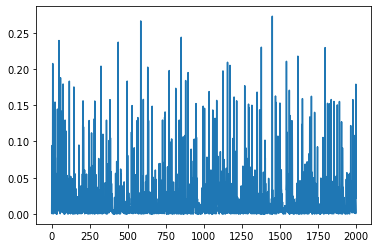

Weight values are [[ 0.28453102 -0.04990064  0.10245951 -0.0435805   0.0313957   0.0364816 ]] 

Mean Square Error is  0.28216366984524704 

Mean Absolute Error is  0.49948038202655975 

Correlation Coefficient is  [0.01884969] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



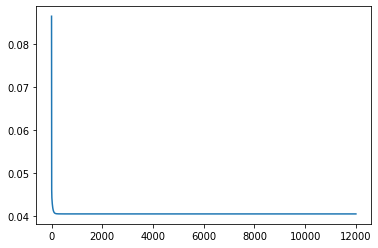

Weight values are [[ 0.35130815 -0.04685329  0.09527214 -0.04444566  0.0451197   0.02455759]] 

Mean Square Error is  0.26307638681311313 

Mean Absolute Error is  0.4994719722953963 

Correlation Coefficient is  [0.01996888] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



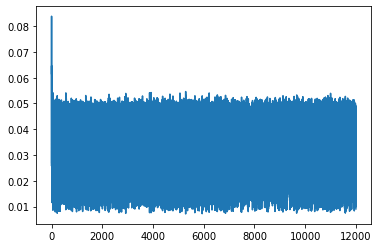

Weight values are [[ 0.29187685 -0.01825715  0.07642417 -0.03598365  0.01465881 -0.0059767 ]] 

Mean Square Error is  0.287168111743087 

Mean Absolute Error is  0.49964929518585866 

Correlation Coefficient is  [0.03139219] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



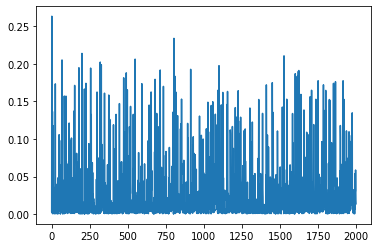

Weight values are [[ 0.16709376 -0.00940485  0.07651504 -0.00638245  0.03761238  0.04164429]] 

Mean Square Error is  0.32204416034535965 

Mean Absolute Error is  0.4999790217855117 

Correlation Coefficient is  [0.00042366] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



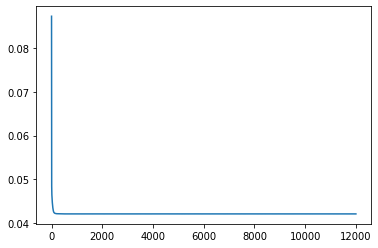

Weight values are [[ 3.64867814e-01 -4.98385624e-05  5.26611639e-02  2.08288675e-05
   2.54819578e-04  4.68857081e-04]] 

Mean Square Error is  0.2621202930727985 

Mean Absolute Error is  0.5000006956825469 

Correlation Coefficient is  [-3.68794333e-05] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



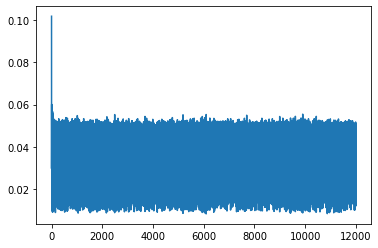

Weight values are [[ 0.32279819 -0.00181484  0.01148132 -0.0016238   0.00427731  0.00194636]] 

Mean Square Error is  0.27896780181453623 

Mean Absolute Error is  0.4999820306903165 

Correlation Coefficient is  [0.00355318] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



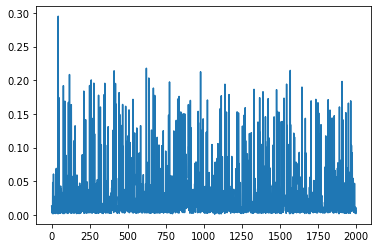

Weight values are [[ 3.00717736e-01 -5.70533074e-02  3.19346429e-04 -5.60528797e-02
   2.00886986e-04 -5.43274832e-03]] 

Mean Square Error is  0.31829039713495855 

Mean Absolute Error is  0.4992783730964301 

Correlation Coefficient is  [0.01749709] 

For alpha value  0.1 , lambda value  0.01 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



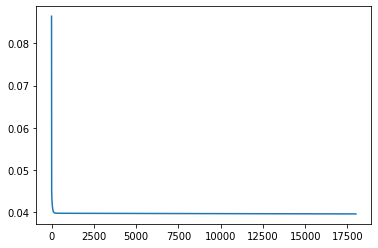

Weight values are [[ 0.38748477 -0.1387283   0.27392457 -0.04101704 -0.34002759  0.26852184]] 

Mean Square Error is  0.2593953743364632 

Mean Absolute Error is  0.4993671597491649 

Correlation Coefficient is  [0.07272753] 

For Polynomial Regression with Mini Batch Gradient Descent. 



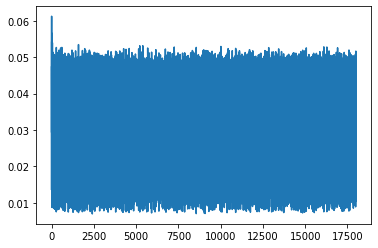

Weight values are [[ 0.2871749   0.10626334  0.4765569  -0.1587062  -0.37082071 -0.01455215]] 

Mean Square Error is  0.28508366720508943 

Mean Absolute Error is  0.4996677517841447 

Correlation Coefficient is  [0.02241361] 

For Polynomial Regression with Stochastic Gradient Descent. 



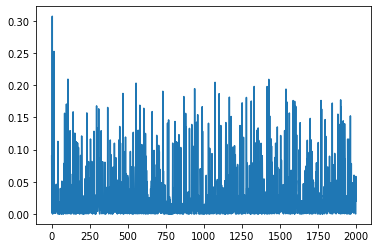

Weight values are [[ 0.29984562 -0.00475092  0.12575174 -0.01420151  0.02421472  0.05835029]] 

Mean Square Error is  0.2657711865054242 

Mean Absolute Error is  0.4999918205720425 

Correlation Coefficient is  [0.00012215] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



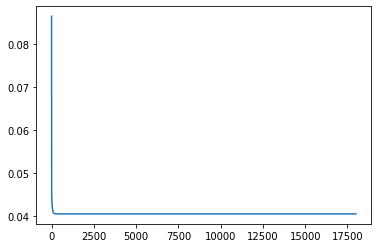

Weight values are [[ 0.35130816 -0.04685332  0.0952722  -0.04444566  0.04511957  0.02455768]] 

Mean Square Error is  0.2630763857697114 

Mean Absolute Error is  0.49947197232496576 

Correlation Coefficient is  [0.01996889] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



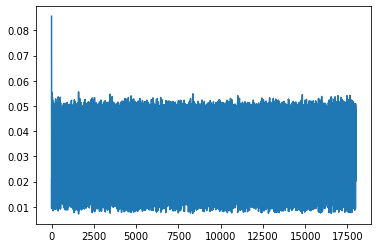

Weight values are [[ 0.31395257 -0.00429112  0.09070456 -0.02166156  0.02929619  0.00740209]] 

Mean Square Error is  0.2696411116871843 

Mean Absolute Error is  0.4998524015784314 

Correlation Coefficient is  [0.00410299] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



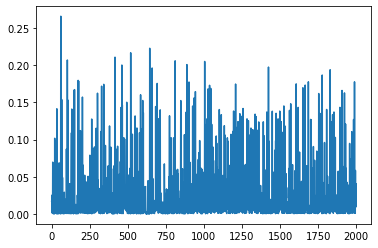

Weight values are [[ 0.3485122  -0.03085118  0.11953228 -0.03460718  0.06242209  0.03953894]] 

Mean Square Error is  0.2583960611753686 

Mean Absolute Error is  0.49966332670928376 

Correlation Coefficient is  [0.00607496] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



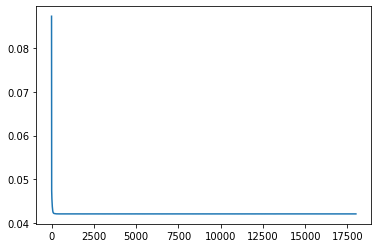

Weight values are [[ 3.64878441e-01 -1.84852645e-04  5.26640080e-02 -3.92264540e-04
   2.79175502e-04  4.71100419e-04]] 

Mean Square Error is  0.262165197241561 

Mean Absolute Error is  0.49999727932641386 

Correlation Coefficient is  [0.00014563] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



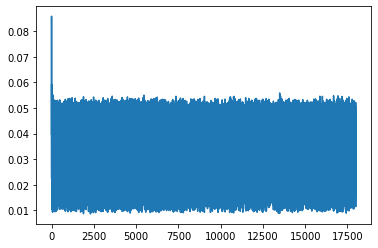

Weight values are [[0.33588066 0.00161629 0.01633526 0.00162757 0.00721445 0.00600788]] 

Mean Square Error is  0.272016498350657 

Mean Absolute Error is  0.5000317358210727 

Correlation Coefficient is  [-0.00274148] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



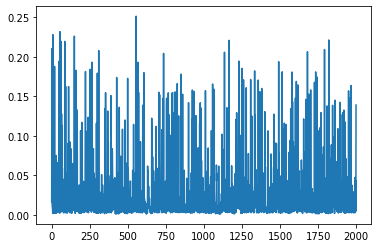

Weight values are [[0.36055933 0.00509382 0.08552043 0.00342479 0.06340013 0.04915488]] 

Mean Square Error is  0.2568535898667406 

Mean Absolute Error is  0.5001464880796754 

Correlation Coefficient is  [-0.00200802] 

For alpha value  0.05 , lambda value  0.3 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



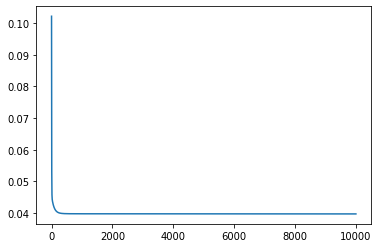

Weight values are [[ 0.37154181 -0.0795335   0.1432287  -0.05509571 -0.04638064  0.08080971]] 

Mean Square Error is  0.2612481870472282 

Mean Absolute Error is  0.49930355990212344 

Correlation Coefficient is  [0.0442185] 

For Polynomial Regression with Mini Batch Gradient Descent. 



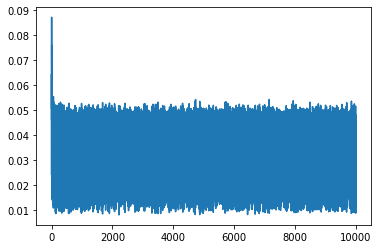

Weight values are [[ 0.30945706  0.01496946  0.18172616 -0.06245869 -0.07211494 -0.00272397]] 

Mean Square Error is  0.27575531505727446 

Mean Absolute Error is  0.499703525497209 

Correlation Coefficient is  [0.01396895] 

For Polynomial Regression with Stochastic Gradient Descent. 



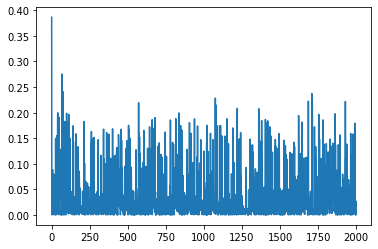

Weight values are [[ 0.29601501 -0.05312199  0.09609327 -0.052376    0.04401887  0.02795432]] 

Mean Square Error is  0.28037713950306936 

Mean Absolute Error is  0.49938924692807396 

Correlation Coefficient is  [0.02702957] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



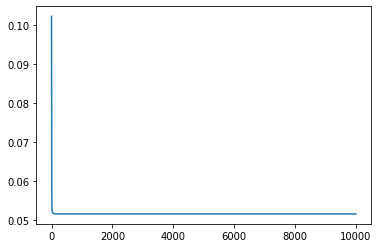

Weight values are [[0.19743727 0.0404933  0.07500882 0.03889619 0.06683367 0.04747205]] 

Mean Square Error is  0.2879620080797948 

Mean Absolute Error is  0.5005889846879631 

Correlation Coefficient is  [-0.00622582] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



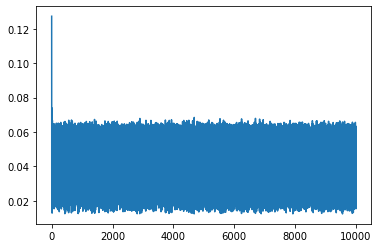

Weight values are [[0.17354479 0.03803438 0.07005642 0.03603688 0.06212916 0.0448842 ]] 

Mean Square Error is  0.2988655600599516 

Mean Absolute Error is  0.5005506946940468 

Correlation Coefficient is  [-0.00622818] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



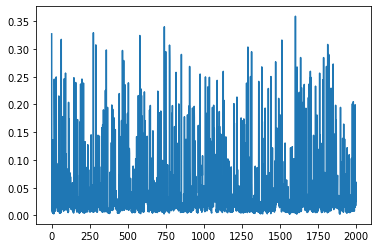

Weight values are [[0.19612507 0.03533323 0.0690642  0.0328016  0.05886181 0.03980182]] 

Mean Square Error is  0.29210274070525466 

Mean Absolute Error is  0.5005038222344007 

Correlation Coefficient is  [-0.00606652] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



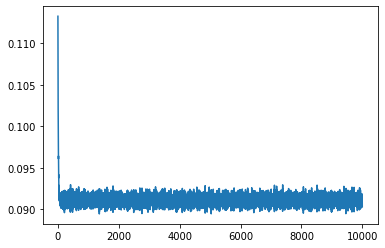

Weight values are [[ 0.23954675  0.00479874  0.00546489 -0.00054411 -0.00162352  0.00070813]] 

Mean Square Error is  0.3155580092108575 

Mean Absolute Error is  0.5000285962679398 

Correlation Coefficient is  [-0.00924489] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



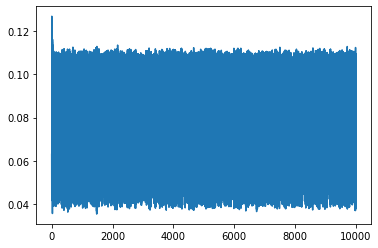

Weight values are [[ 0.17988117 -0.00379198 -0.0013141   0.00280846  0.00532913  0.00545571]] 

Mean Square Error is  0.34987673630908117 

Mean Absolute Error is  0.5000034875860048 

Correlation Coefficient is  [-0.00116192] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



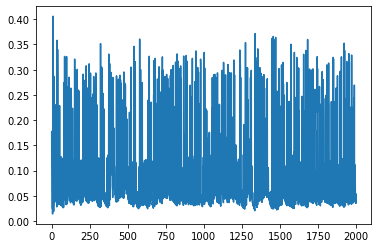

Weight values are [[ 0.21783725  0.00305939  0.0087659   0.00366102  0.00342633 -0.00533529]] 

Mean Square Error is  0.32586149161734257 

Mean Absolute Error is  0.5000321369818773 

Correlation Coefficient is  [-0.00672621] 

For alpha value  0.05 , lambda value  0.3 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



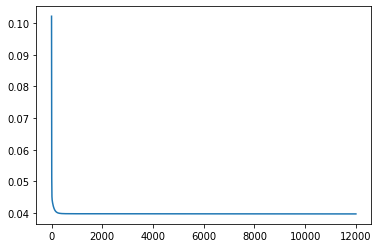

Weight values are [[ 0.37276625 -0.08407136  0.15387522 -0.05406301 -0.06973253  0.09544272]] 

Mean Square Error is  0.2610961740180387 

Mean Absolute Error is  0.4993086056687227 

Correlation Coefficient is  [0.04552623] 

For Polynomial Regression with Mini Batch Gradient Descent. 



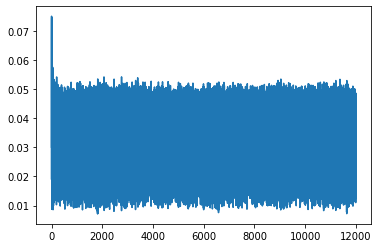

Weight values are [[ 0.31264501  0.01999644  0.20503593 -0.07244275 -0.09606925 -0.00588424]] 

Mean Square Error is  0.2758650212223199 

Mean Absolute Error is  0.49966780527177007 

Correlation Coefficient is  [0.01827822] 

For Polynomial Regression with Stochastic Gradient Descent. 



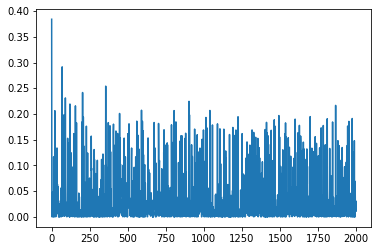

Weight values are [[ 0.33262688 -0.06103079  0.09764137 -0.06298319  0.04259439  0.01984092]] 

Mean Square Error is  0.27234019752927907 

Mean Absolute Error is  0.4992577509754897 

Correlation Coefficient is  [0.05553803] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



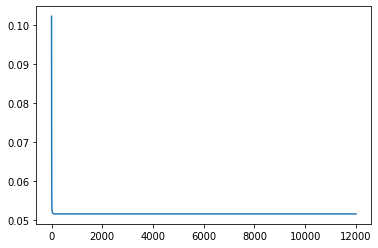

Weight values are [[0.19743727 0.0404933  0.07500882 0.03889619 0.06683367 0.04747205]] 

Mean Square Error is  0.2879620080797948 

Mean Absolute Error is  0.5005889846879631 

Correlation Coefficient is  [-0.00622582] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



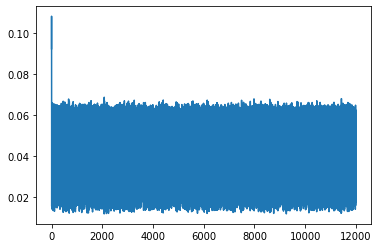

Weight values are [[0.17704141 0.03936736 0.07136013 0.03733099 0.06323891 0.04589911]] 

Mean Square Error is  0.2966791844771327 

Mean Absolute Error is  0.5005691343312997 

Correlation Coefficient is  [-0.00628542] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



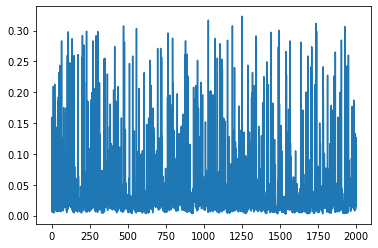

Weight values are [[0.20561582 0.05878067 0.08981904 0.055947   0.07920343 0.06258235]] 

Mean Square Error is  0.2804525630034538 

Mean Absolute Error is  0.5008398440324003 

Correlation Coefficient is  [-0.00689082] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



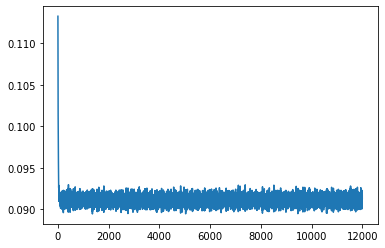

Weight values are [[0.23972276 0.00867606 0.00336026 0.0086836  0.00220294 0.00761979]] 

Mean Square Error is  0.31021237812227787 

Mean Absolute Error is  0.5001235466543597 

Correlation Coefficient is  [-0.01153022] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



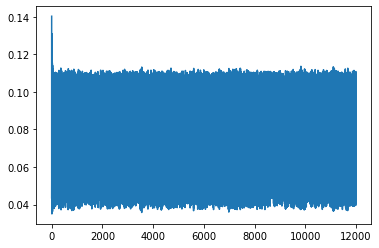

Weight values are [[ 1.95144131e-01 -1.58875021e-05  1.04836683e-02 -2.83020545e-03
   2.35158647e-03  7.21803273e-03]] 

Mean Square Error is  0.3378517451493706 

Mean Absolute Error is  0.49999598881291873 

Correlation Coefficient is  [0.00065895] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



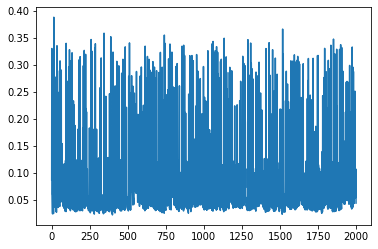

Weight values are [[ 0.26018731 -0.0048329   0.0046273  -0.0071377   0.01033431 -0.00030924]] 

Mean Square Error is  0.30692073801792885 

Mean Absolute Error is  0.499924355510842 

Correlation Coefficient is  [0.07408107] 

For alpha value  0.05 , lambda value  0.3 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



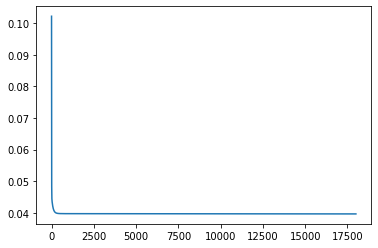

Weight values are [[ 0.37644183 -0.09770251  0.18520873 -0.05091247 -0.1390097   0.13914617]] 

Mean Square Error is  0.2606496978989185 

Mean Absolute Error is  0.4993235864655173 

Correlation Coefficient is  [0.05005707] 

For Polynomial Regression with Mini Batch Gradient Descent. 



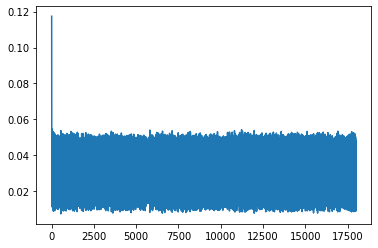

Weight values are [[ 0.31504619  0.05043901  0.28259663 -0.08643728 -0.15953525 -0.00046062]] 

Mean Square Error is  0.27012020117763236 

Mean Absolute Error is  0.49978566908113214 

Correlation Coefficient is  [0.006951] 

For Polynomial Regression with Stochastic Gradient Descent. 



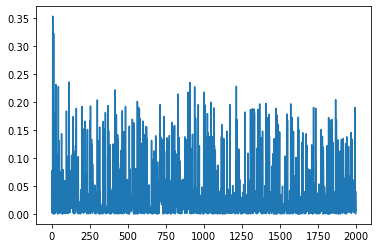

Weight values are [[ 0.36334857 -0.09280206  0.11337166 -0.09197453  0.05414532  0.02221862]] 

Mean Square Error is  0.2676579399018252 

Mean Absolute Error is  0.49887986347986174 

Correlation Coefficient is  [0.32602936] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



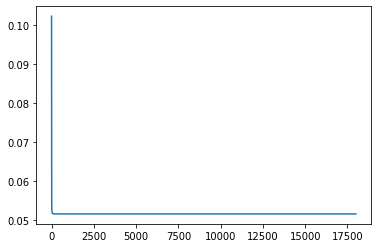

Weight values are [[0.19743727 0.0404933  0.07500882 0.03889619 0.06683367 0.04747205]] 

Mean Square Error is  0.2879620080797948 

Mean Absolute Error is  0.5005889846879631 

Correlation Coefficient is  [-0.00622582] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



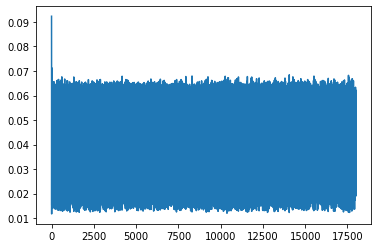

Weight values are [[0.17164337 0.03564622 0.06710519 0.03361537 0.05901681 0.0419415 ]] 

Mean Square Error is  0.30161274036773494 

Mean Absolute Error is  0.5005148984829753 

Correlation Coefficient is  [-0.00616207] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



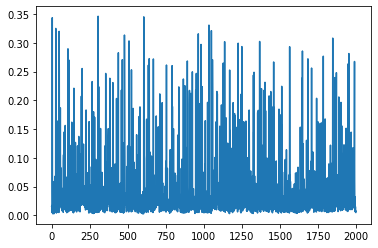

Weight values are [[0.15550313 0.01583491 0.0387585  0.01448686 0.03124405 0.0152995 ]] 

Mean Square Error is  0.334188656708756 

Mean Absolute Error is  0.5002196806680688 

Correlation Coefficient is  [-0.0053935] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



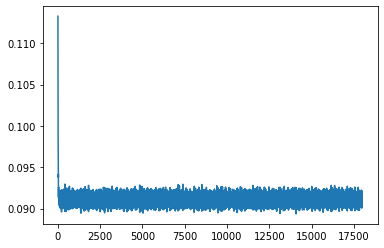

Weight values are [[ 0.23995747  0.00550239  0.01175459  0.00656348 -0.00159072 -0.00179846]] 

Mean Square Error is  0.3124606306649894 

Mean Absolute Error is  0.5000723834836936 

Correlation Coefficient is  [-0.01008898] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



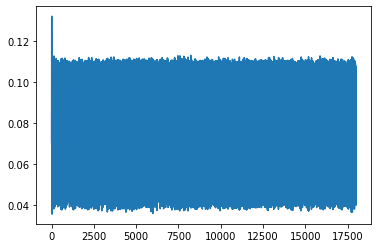

Weight values are [[ 0.19931607 -0.00127037 -0.00032722  0.00914225  0.00237013  0.00064228]] 

Mean Square Error is  0.3373231207067875 

Mean Absolute Error is  0.5000497325605935 

Correlation Coefficient is  [-0.01344205] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



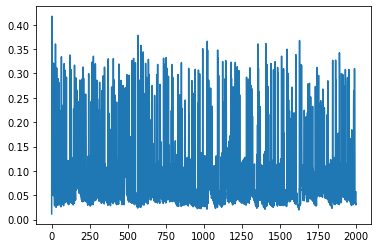

Weight values are [[0.18179317 0.0154645  0.00228673 0.00935348 0.00614279 0.01140295]] 

Mean Square Error is  0.3378912418789751 

Mean Absolute Error is  0.5001781657938483 

Correlation Coefficient is  [-0.01137312] 

For alpha value  0.05 , lambda value  0.5 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



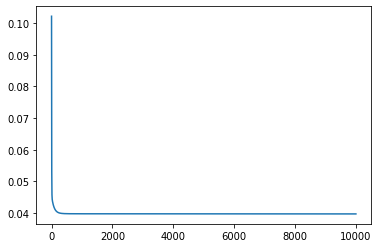

Weight values are [[ 0.37154181 -0.0795335   0.1432287  -0.05509571 -0.04638064  0.08080971]] 

Mean Square Error is  0.2612481870472282 

Mean Absolute Error is  0.49930355990212344 

Correlation Coefficient is  [0.0442185] 

For Polynomial Regression with Mini Batch Gradient Descent. 



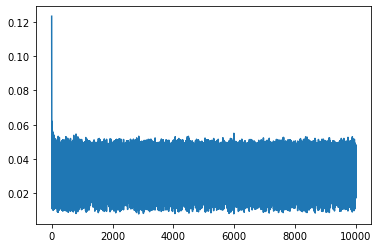

Weight values are [[ 0.33334392  0.02370129  0.19037378 -0.05422005 -0.06493948  0.00341894]] 

Mean Square Error is  0.2646366716964529 

Mean Absolute Error is  0.49982188501769576 

Correlation Coefficient is  [0.00510422] 

For Polynomial Regression with Stochastic Gradient Descent. 



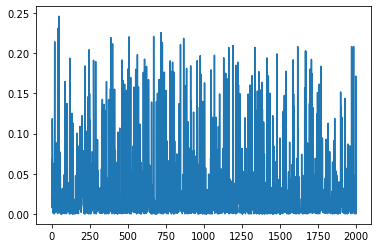

Weight values are [[ 0.31248959 -0.04961456  0.10787162 -0.05640958  0.04369736  0.02687125]] 

Mean Square Error is  0.27351883310015096 

Mean Absolute Error is  0.49938460598239526 

Correlation Coefficient is  [0.02360317] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



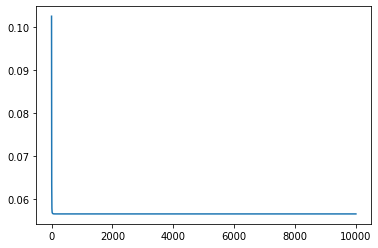

Weight values are [[0.16716497 0.04699997 0.07191297 0.04560093 0.06555944 0.0509292 ]] 

Mean Square Error is  0.2975438773652055 

Mean Absolute Error is  0.5006785713702798 

Correlation Coefficient is  [-0.00686185] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



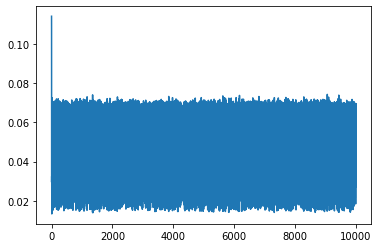

Weight values are [[0.15442916 0.0444205  0.06918784 0.04275351 0.06271215 0.04905039]] 

Mean Square Error is  0.3043861352469732 

Mean Absolute Error is  0.5006409235391487 

Correlation Coefficient is  [-0.00679211] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



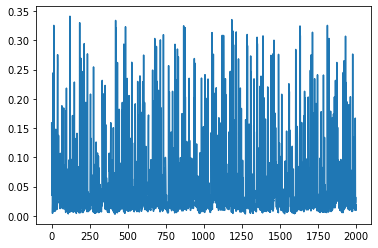

Weight values are [[0.1465012  0.03706515 0.05805148 0.03541328 0.05144639 0.03866639]] 

Mean Square Error is  0.31578368542032653 

Mean Absolute Error is  0.5005289117292989 

Correlation Coefficient is  [-0.00681139] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



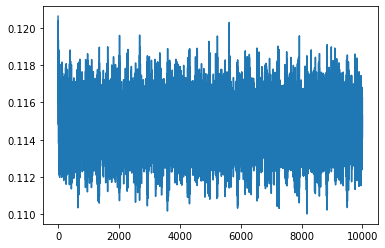

Weight values are [[ 0.13531892 -0.00414313  0.00492785 -0.00659834  0.01273889  0.00952937]] 

Mean Square Error is  0.377283821206654 

Mean Absolute Error is  0.4999506657213166 

Correlation Coefficient is  [0.00842154] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



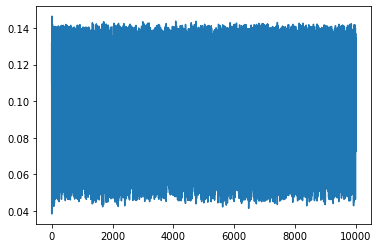

Weight values are [[ 0.11307942  0.00226561  0.00762176  0.01879912  0.01080956 -0.00457097]] 

Mean Square Error is  0.38675243085286376 

Mean Absolute Error is  0.5001222815992753 

Correlation Coefficient is  [-0.00996951] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



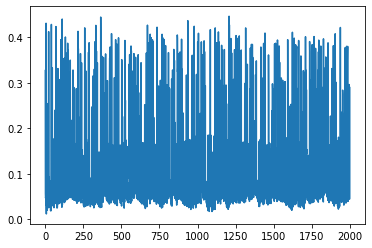

Weight values are [[ 0.14328981  0.00716895  0.01011358 -0.00017757  0.01254258 -0.00624435]] 

Mean Square Error is  0.36916897252213693 

Mean Absolute Error is  0.5000328756073253 

Correlation Coefficient is  [-0.00398456] 

For alpha value  0.05 , lambda value  0.5 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



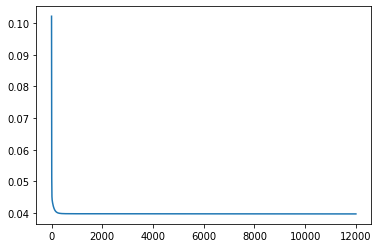

Weight values are [[ 0.37276625 -0.08407136  0.15387522 -0.05406301 -0.06973253  0.09544272]] 

Mean Square Error is  0.2610961740180387 

Mean Absolute Error is  0.4993086056687227 

Correlation Coefficient is  [0.04552623] 

For Polynomial Regression with Mini Batch Gradient Descent. 



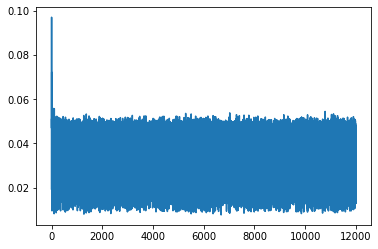

Weight values are [[ 0.31153767  0.01783538  0.20206319 -0.07445626 -0.09957912 -0.00811007]] 

Mean Square Error is  0.27816987507890173 

Mean Absolute Error is  0.4996373387722229 

Correlation Coefficient is  [0.02654509] 

For Polynomial Regression with Stochastic Gradient Descent. 



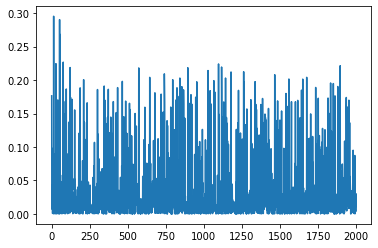

Weight values are [[ 0.3341843  -0.0410088   0.10410967 -0.03838862  0.05399457  0.03623154]] 

Mean Square Error is  0.2633788141753059 

Mean Absolute Error is  0.4995688262390037 

Correlation Coefficient is  [0.0105261] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



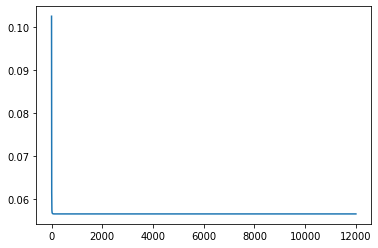

Weight values are [[0.16716497 0.04699997 0.07191297 0.04560093 0.06555944 0.0509292 ]] 

Mean Square Error is  0.2975438773652055 

Mean Absolute Error is  0.5006785713702798 

Correlation Coefficient is  [-0.00686185] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



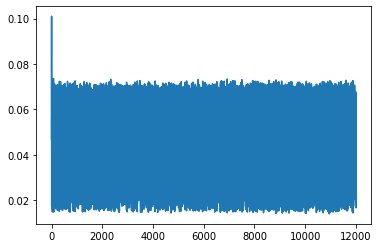

Weight values are [[0.13894638 0.03684409 0.06049074 0.03533546 0.05459534 0.0416892 ]] 

Mean Square Error is  0.3179498310057891 

Mean Absolute Error is  0.5005327230672307 

Correlation Coefficient is  [-0.00661048] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



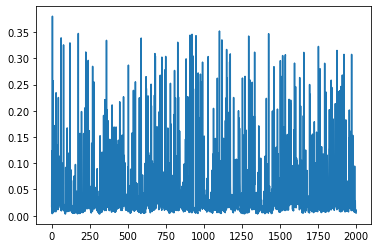

Weight values are [[0.12495364 0.01172365 0.04245252 0.01046286 0.03705451 0.02148627]] 

Mean Square Error is  0.3505800093196788 

Mean Absolute Error is  0.5001801880376668 

Correlation Coefficient is  [-0.00414886] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



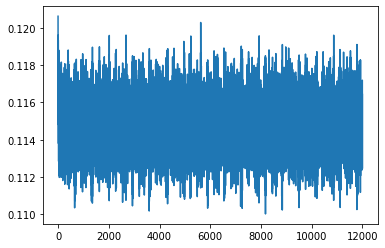

Weight values are [[ 0.13302309 -0.00552538 -0.00123888 -0.00322806  0.01891751  0.01156715]] 

Mean Square Error is  0.377584642461016 

Mean Absolute Error is  0.4999665646687106 

Correlation Coefficient is  [0.00459433] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



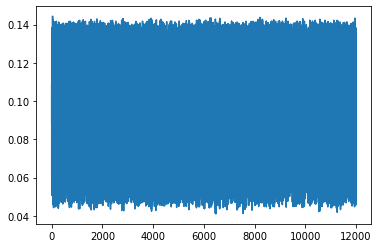

Weight values are [[ 0.07067224 -0.00404312  0.01246532  0.00677781  0.01722402 -0.00046037]] 

Mean Square Error is  0.42121084020973976 

Mean Absolute Error is  0.5000153074658206 

Correlation Coefficient is  [-0.00135544] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



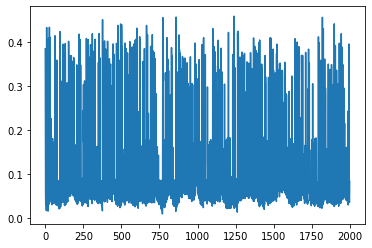

Weight values are [[ 0.09730169  0.00405921  0.00054324  0.00354129  0.00600023 -0.00438574]] 

Mean Square Error is  0.40829946396717476 

Mean Absolute Error is  0.5000395690884193 

Correlation Coefficient is  [-0.01156065] 

For alpha value  0.05 , lambda value  0.5 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



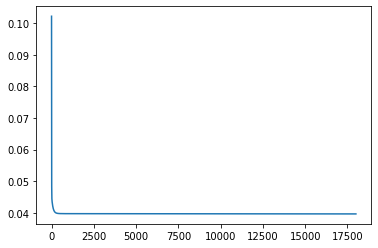

Weight values are [[ 0.37644183 -0.09770251  0.18520873 -0.05091247 -0.1390097   0.13914617]] 

Mean Square Error is  0.2606496978989185 

Mean Absolute Error is  0.4993235864655173 

Correlation Coefficient is  [0.05005707] 

For Polynomial Regression with Mini Batch Gradient Descent. 



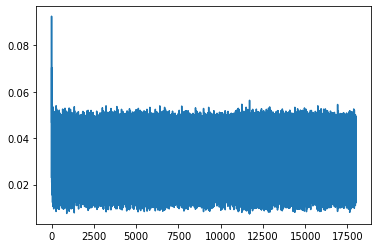

Weight values are [[ 0.3106475   0.04643502  0.27717365 -0.09069274 -0.16517243 -0.00564941]] 

Mean Square Error is  0.2745099081952648 

Mean Absolute Error is  0.4997239605854399 

Correlation Coefficient is  [0.01240616] 

For Polynomial Regression with Stochastic Gradient Descent. 



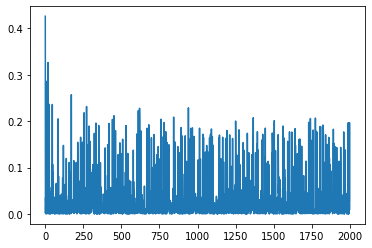

Weight values are [[ 0.33877229 -0.07250084  0.09233587 -0.07123971  0.04425888  0.01513306]] 

Mean Square Error is  0.27456357483982735 

Mean Absolute Error is  0.49912451083072895 

Correlation Coefficient is  [0.22527749] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



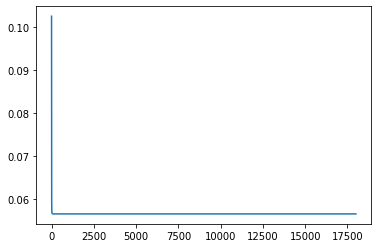

Weight values are [[0.16716497 0.04699997 0.07191297 0.04560093 0.06555944 0.0509292 ]] 

Mean Square Error is  0.2975438773652055 

Mean Absolute Error is  0.5006785713702798 

Correlation Coefficient is  [-0.00686185] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



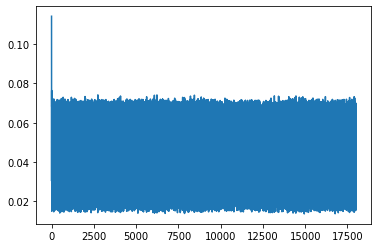

Weight values are [[0.14633559 0.04355486 0.06699075 0.0420014  0.06098757 0.04809969]] 

Mean Square Error is  0.3088728271287905 

Mean Absolute Error is  0.5006289453856467 

Correlation Coefficient is  [-0.00683069] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



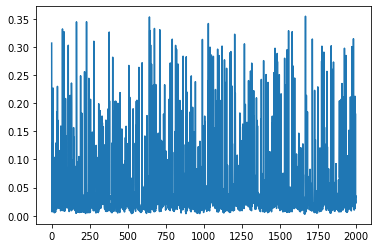

Weight values are [[0.16012727 0.04238846 0.06601541 0.04117609 0.05973792 0.04569892]] 

Mean Square Error is  0.303861651201646 

Mean Absolute Error is  0.5006118576605662 

Correlation Coefficient is  [-0.00681749] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



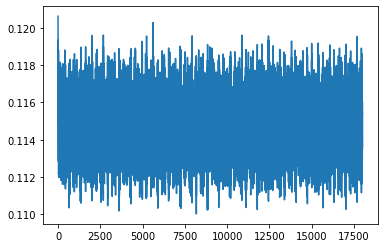

Weight values are [[ 0.13589755 -0.00367969  0.0109341   0.01278613  0.0178734  -0.00217462]] 

Mean Square Error is  0.3702345411772627 

Mean Absolute Error is  0.500051609109371 

Correlation Coefficient is  [-0.00409494] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



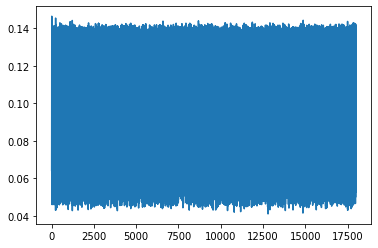

Weight values are [[ 0.09156449 -0.00234872  0.00902772  0.0129275   0.01879979  0.00401681]] 

Mean Square Error is  0.4004222768588822 

Mean Absolute Error is  0.5000726642338919 

Correlation Coefficient is  [-0.00485968] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



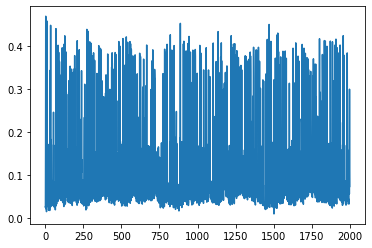

Weight values are [[0.12003277 0.02080452 0.03838271 0.0430813  0.03500948 0.02802825]] 

Mean Square Error is  0.3422666188818296 

Mean Absolute Error is  0.5004525426998047 

Correlation Coefficient is  [-0.00778367] 

For alpha value  0.05 , lambda value  0.01 ,  10000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



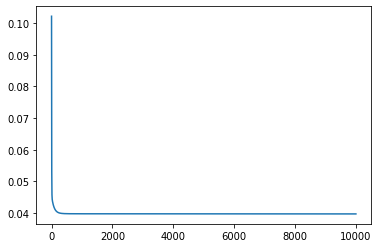

Weight values are [[ 0.37154181 -0.0795335   0.1432287  -0.05509571 -0.04638064  0.08080971]] 

Mean Square Error is  0.2612481870472282 

Mean Absolute Error is  0.49930355990212344 

Correlation Coefficient is  [0.0442185] 

For Polynomial Regression with Mini Batch Gradient Descent. 



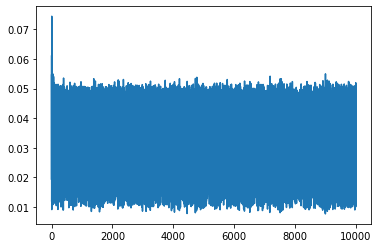

Weight values are [[ 0.30655803  0.00849229  0.17927276 -0.06889039 -0.07421345 -0.00684347]] 

Mean Square Error is  0.2799997375143221 

Mean Absolute Error is  0.4996145685741927 

Correlation Coefficient is  [0.0281879] 

For Polynomial Regression with Stochastic Gradient Descent. 



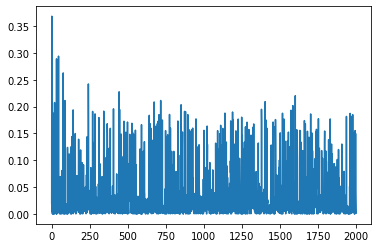

Weight values are [[ 0.38515775 -0.08266522  0.09440531 -0.08499199  0.0341182   0.00102651]] 

Mean Square Error is  0.26764499156932225 

Mean Absolute Error is  0.4989478264409632 

Correlation Coefficient is  [0.08160713] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



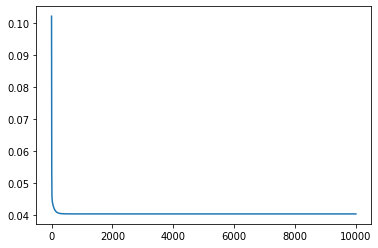

Weight values are [[ 0.35129991 -0.04682277  0.0952009  -0.04445264  0.04527627  0.02445932]] 

Mean Square Error is  0.26307754298691005 

Mean Absolute Error is  0.4994719384576653 

Correlation Coefficient is  [0.01996729] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



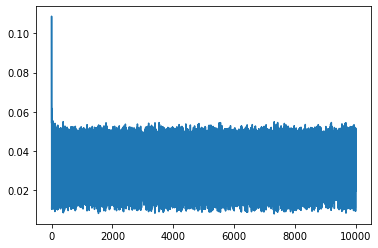

Weight values are [[ 0.30338574 -0.00900644  0.08763857 -0.02666014  0.02637087  0.00454375]] 

Mean Square Error is  0.27495428834859703 

Mean Absolute Error is  0.49978594738872173 

Correlation Coefficient is  [0.00726647] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



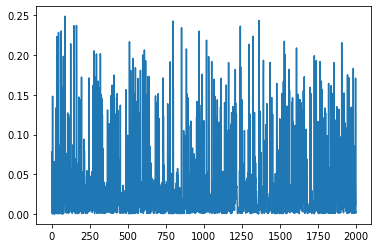

Weight values are [[ 0.39338971 -0.06961644  0.08923904 -0.07424634  0.03867913 -0.00170299]] 

Mean Square Error is  0.262925023530714 

Mean Absolute Error is  0.49909252680771454 

Correlation Coefficient is  [0.1544534] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



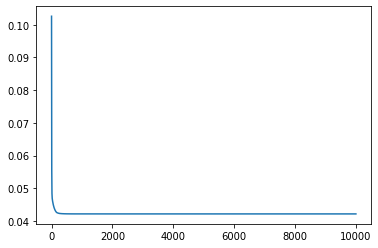

Weight values are [[ 3.64861518e-01 -2.95180838e-04  5.29676322e-02 -6.41667601e-05
   1.82268394e-04 -6.32695261e-05]] 

Mean Square Error is  0.26217864218345294 

Mean Absolute Error is  0.49999759900683405 

Correlation Coefficient is  [0.00012878] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



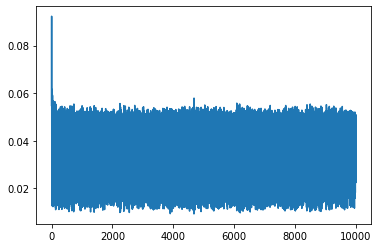

Weight values are [[0.3543226  0.00623144 0.03096105 0.0056808  0.01151632 0.00890914]] 

Mean Square Error is  0.2636120031168337 

Mean Absolute Error is  0.5000917758936961 

Correlation Coefficient is  [-0.00411231] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



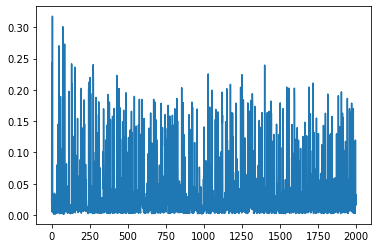

Weight values are [[ 0.3719713  -0.00457729  0.03601585 -0.00393174  0.02323165  0.01601009]] 

Mean Square Error is  0.25959055563693234 

Mean Absolute Error is  0.49997664183773394 

Correlation Coefficient is  [0.0009889] 

For alpha value  0.05 , lambda value  0.01 ,  12000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



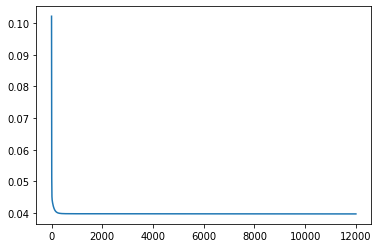

Weight values are [[ 0.37276625 -0.08407136  0.15387522 -0.05406301 -0.06973253  0.09544272]] 

Mean Square Error is  0.2610961740180387 

Mean Absolute Error is  0.4993086056687227 

Correlation Coefficient is  [0.04552623] 

For Polynomial Regression with Mini Batch Gradient Descent. 



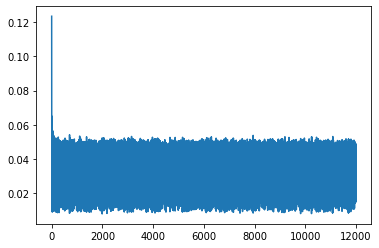

Weight values are [[ 0.31111401  0.02047607  0.20467468 -0.07295096 -0.09858425 -0.00605596]] 

Mean Square Error is  0.27680983875123755 

Mean Absolute Error is  0.4996673947452859 

Correlation Coefficient is  [0.01945915] 

For Polynomial Regression with Stochastic Gradient Descent. 



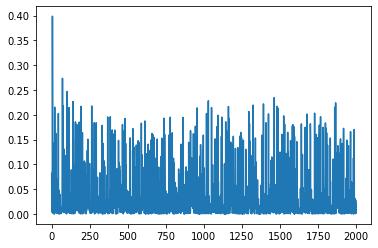

Weight values are [[ 0.3300064  -0.02216727  0.1057546  -0.02492147  0.05065251  0.03563273]] 

Mean Square Error is  0.2621990199257307 

Mean Absolute Error is  0.4997713800303442 

Correlation Coefficient is  [0.00444609] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



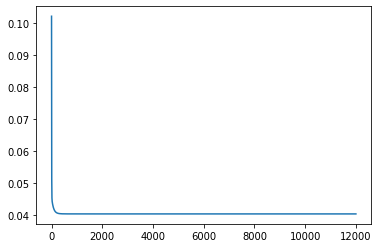

Weight values are [[ 0.35130512 -0.04684208  0.09524623 -0.04444825  0.04517688  0.02452158]] 

Mean Square Error is  0.2630768111336621 

Mean Absolute Error is  0.49947195993370314 

Correlation Coefficient is  [0.0199683] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



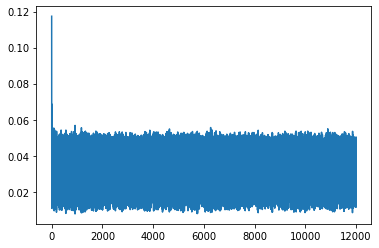

Weight values are [[ 0.31628691 -0.00702779  0.08759082 -0.02497099  0.02518622  0.00345684]] 

Mean Square Error is  0.2709369939281646 

Mean Absolute Error is  0.4998069890489405 

Correlation Coefficient is  [0.00645118] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



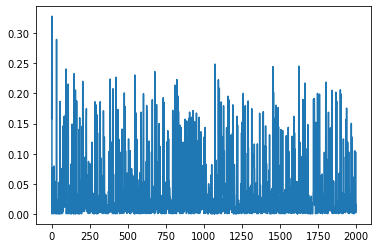

Weight values are [[ 0.3383669  -0.0100848   0.07191645 -0.01325716  0.03603884  0.0106329 ]] 

Mean Square Error is  0.2641972939561882 

Mean Absolute Error is  0.4998735763806967 

Correlation Coefficient is  [0.00374381] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



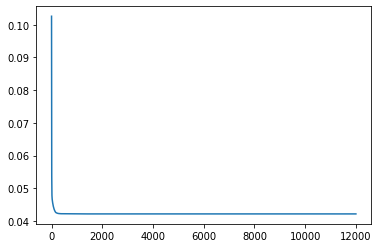

Weight values are [[ 3.64880194e-01 -2.39116132e-04  5.29848141e-02  1.13109242e-04
   3.21861578e-05  3.79016279e-04]] 

Mean Square Error is  0.26212461741021964 

Mean Absolute Error is  0.49999988959520153 

Correlation Coefficient is  [5.86201547e-06] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



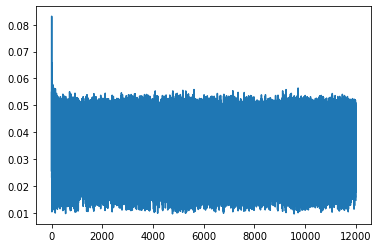

Weight values are [[ 3.30800910e-01 -2.79296727e-03  1.63450037e-02 -3.06560556e-03
   1.94857189e-03 -1.52494970e-04]] 

Mean Square Error is  0.2765983615364399 

Mean Absolute Error is  0.4999628956950842 

Correlation Coefficient is  [0.0084929] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



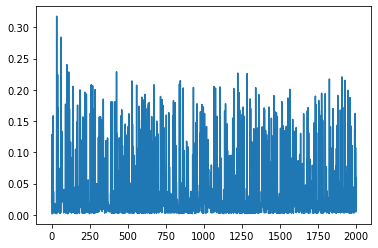

Weight values are [[0.40800754 0.05718552 0.0939556  0.0566235  0.07411045 0.06386084]] 

Mean Square Error is  0.2721459840872297 

Mean Absolute Error is  0.5008362652648324 

Correlation Coefficient is  [-0.00687321] 

For alpha value  0.05 , lambda value  0.01 ,  18000  iterations,  2000  epochs and/or  40  batch size we get the following error and correlation values.

For Polynomial Regression with Batch Gradient Descent. 



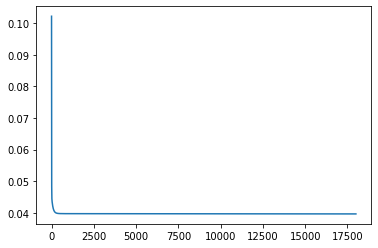

Weight values are [[ 0.37644183 -0.09770251  0.18520873 -0.05091247 -0.1390097   0.13914617]] 

Mean Square Error is  0.2606496978989185 

Mean Absolute Error is  0.4993235864655173 

Correlation Coefficient is  [0.05005707] 

For Polynomial Regression with Mini Batch Gradient Descent. 



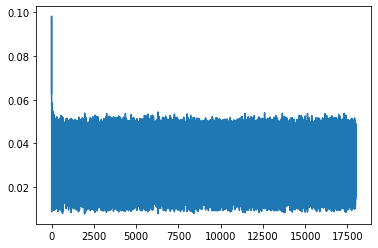

Weight values are [[ 0.31693313  0.04734467  0.27808891 -0.08909461 -0.16409107 -0.00469946]] 

Mean Square Error is  0.2718867655529263 

Mean Absolute Error is  0.49974145871031306 

Correlation Coefficient is  [0.010703] 

For Polynomial Regression with Stochastic Gradient Descent. 



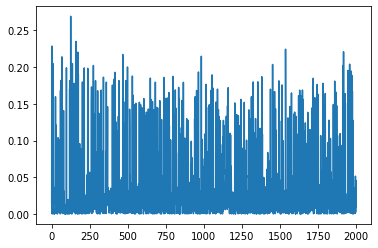

Weight values are [[ 0.33026385 -0.04783506  0.106639   -0.05221943  0.04249625  0.02813083]] 

Mean Square Error is  0.26785905097582435 

Mean Absolute Error is  0.4994242961808359 

Correlation Coefficient is  [0.02075711] 

For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. 



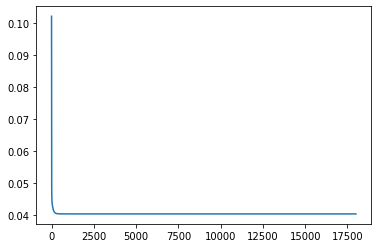

Weight values are [[ 0.35130801 -0.04685276  0.09527095 -0.04444579  0.04512237  0.0245559 ]] 

Mean Square Error is  0.263076406892644 

Mean Absolute Error is  0.4994719717180961 

Correlation Coefficient is  [0.01996886] 

For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. 



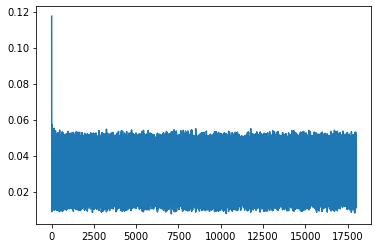

Weight values are [[ 0.30321146 -0.00882216  0.08507311 -0.02648666  0.02337282  0.00268873]] 

Mean Square Error is  0.27596287795605084 

Mean Absolute Error is  0.4997846977031729 

Correlation Coefficient is  [0.00798549] 

For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. 



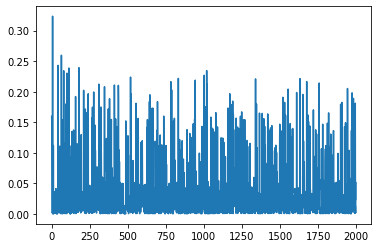

Weight values are [[ 0.31980003 -0.01438007  0.10271796 -0.01764639  0.05816982  0.03588143]] 

Mean Square Error is  0.2631071100943023 

Mean Absolute Error is  0.4998666184389792 

Correlation Coefficient is  [0.00228588] 

For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. 



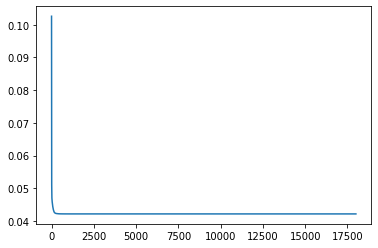

Weight values are [[ 3.64848144e-01 -1.34983227e-04  5.29628612e-02  8.16606094e-05
   1.06011518e-05  1.37482965e-04]] 

Mean Square Error is  0.262151227265243 

Mean Absolute Error is  0.49999990367458624 

Correlation Coefficient is  [5.13494562e-06] 

For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. 



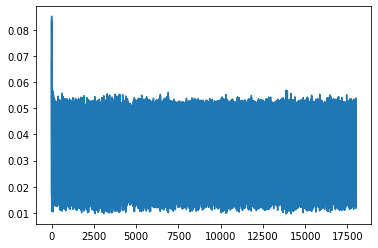

Weight values are [[ 3.35567043e-01  6.61754844e-05  1.77773166e-02 -1.12700112e-04
   3.94235752e-03  2.48443572e-03]] 

Mean Square Error is  0.27331033729396814 

Mean Absolute Error is  0.5000044126946758 

Correlation Coefficient is  [-0.00051681] 

For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. 



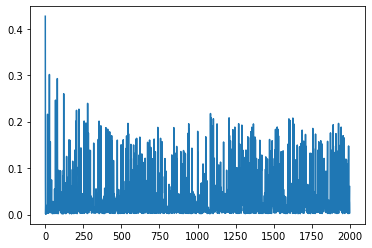

Weight values are [[ 3.33386722e-01  3.91061718e-03  4.64026523e-03  3.35827182e-03
  -3.27853975e-05  4.52506027e-03]] 

Mean Square Error is  0.27516454180043337 

Mean Absolute Error is  0.5000543025700838 

Correlation Coefficient is  [-0.00942419] 



In [53]:
batch_size = 40
n_epochs = 2000

for i in range (0,3):
  alpha = alphaoptions[i]
  for k in range(0,3):
    lamb = lamboptions[k]
    for l in range (0,3):
      iters = iterationsoptions[l]
      print("For alpha value ",alpha,", lambda value ",lamb,", ",iters," iterations, ",n_epochs," epochs and/or ",batch_size," batch size we get the following error and correlation values.\n")
      print("For Polynomial Regression with Batch Gradient Descent. \n")
      PR_BG(alpha,iters)
      print("For Polynomial Regression with Mini Batch Gradient Descent. \n")
      PR_MBGD(alpha,iters,batch_size)
      print("For Polynomial Regression with Stochastic Gradient Descent. \n")
      PR_SGD(alpha,n_epochs)
      print("For Polynomial Regression with Batch Gradient Descent and L2 Norm Regularisation. \n")
      PR_L2_BGD(alpha,iters,lamb)
      print("For Polynomial Regression with Mini Batch Gradient Descent and L2 Norm Regularisation. \n")
      PR_L2_MBGD(alpha,iters,batch_size,lamb)
      print("For Polynomial Regression with Stochastic Gradient Descent and L2 Norm Regularisation. \n")
      PR_L2_SGD(alpha,n_epochs,lamb)
      print("For Polynomial Regression with Batch Gradient Descent and L1 Norm Regularisation. \n")
      PR_L1_BGD(alpha,iters,lamb)
      print("For Polynomial Regression with Mini Batch Gradient Descent and L1 Norm Regularisation. \n")
      PR_L1_MBGD(alpha,iters,batch_size,lamb)
      print("For Polynomial Regression with Stochastic Gradient Descent and L1 Norm Regularisation. \n")
      PR_L1_SGD(alpha,n_epochs,lamb)
